# 五、常微分方程

## 1. 符号解法

SymPy库提供了dsolve函数求常微分方程的符号解.
在声明时, 可以使用Function()函数
>$y=Function('y')$
或者\
>$y=\operatorname{symbols}('\mathrm{y}' , cls=Function)$
将符号变量声明为函数类型.

例 求下列微分方程的通解:
(1)齐次方程: $y^{\prime \prime}-5 y^{\prime}+6 y=0$;
(2)非齐次方程: $y^{\prime \prime}-5 y^{\prime}+6 y=x e^{2 x}$.

即知齐次方程的通解为
$$
y(x)=\left(c_1+c_2 e^x\right) e^{2 x} ;
$$
非齐次方程的通解为
$$
y(x)=\left(c_1+c_2 e^x-\frac{x^2}{2}-x\right) e^{2 x} .
$$

## 2. 数值解法
Python对于常微分方程的数值求解是基于一阶方程进行的，高阶微分方程必须化成一阶方程组。

### 2.1 一阶常微分方程
$$
\left\{
\begin{align*}
&y' = -2y + x^2 +2x\\
&y(1) = 2
\end{align*}
\right.
$$

In [ ]:
from scipy.integrate import odeint
import numpy as np

dy = lambda y, x:-2*y + x**2 + 2*x
x = np.arange(1, 10.5, 0.5)
sol = odeint(dy, 2, x)
print("x={}\n对应的数值解y={}".format(x, sol.T))

x=[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10. ]
对应的数值解y=[[ 2.          2.08484933  2.9191691   4.18723381  5.77289452  7.63342241
   9.75309843 12.12613985 14.75041934 17.62515427 20.75005673 24.12502089
  27.7500077  31.62500278 35.75000104 40.1250004  44.75000015 49.62500006
  54.75000002]]


### 2.2 二阶常微分方程
$$
\left\{
\begin{align*}
&\frac{d^2 y}{dx^2} + 2\frac{dy}{dx} + 2y =0\\
&y(0) = 0, y'(0) = 1.
\end{align*}
\right.
$$
转换为
$$
\left\{
\begin{align*}
&y_1' = y_2, y_1(0)=0\\
&y_2' = -2 y_1 -2 y_2, y_2(0)=1.
\end{align*}
\right.
$$

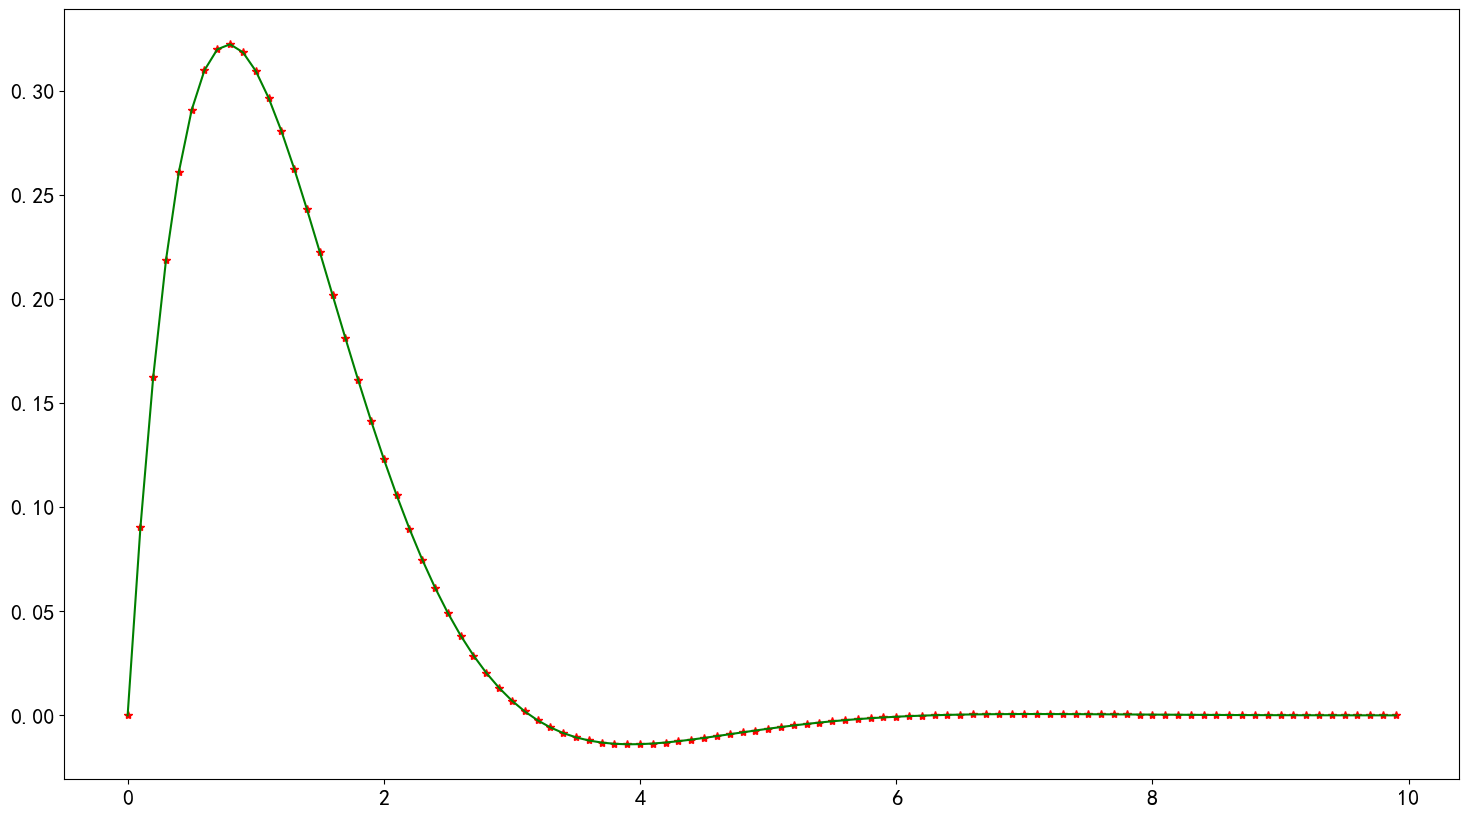

In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

def Pfun(y, x): # 注意！！！！！！y与x位置不能颠倒
    y1, y2 = y
    return np.array([y2, -2*y1-2*y2])

x = np.arange(0, 10, 0.1)
solution = odeint(Pfun, [0, 1], x)
plt.figure(figsize=(18, 10))
plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.plot(x, solution[:, 0], 'r*', label='数值解')
plt.plot(x, np.exp(-x)*np.sin(x), 'g', label='符号解')
plt.show()

### 2.3 欧拉法

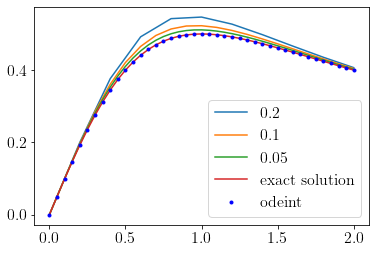

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


hs = [0.2, 0.1,0.05]

for h in hs:
    x = np.arange(0,2.01,h)
    n = len(x)
    y = np.zeros(n)

    for i in range(0,n-1):
        y[i+1] = y[i] + h*(1/(1+x[i]**2) - 2*y[i]**2)

    plt.plot(x,y,label = str(h))

y_real = x/(1+x**2)
plt.plot(x,y_real, label  = 'exact solution')

fun = lambda y,x: 1/(1+x**2) -2*y**2
x = np.arange(0,2.01,0.05)
sol = odeint(fun, 0, x)
sol.resize(1,len(x))
plt.plot(x, sol[0],'b.', label = 'odeint')

plt.legend()

### 2.4 改进的欧拉法

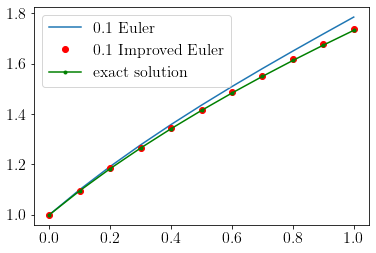

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
hs = [0.1]

for h in hs:
    x = np.arange(0,1.01,h)
    n = len(x)
    y = np.zeros(n)
    y[0] = 1
    # 欧拉法
    for i in range(0,n-1):
        y[i+1] = 1.1*y[i] - 2*h*x[i]/y[i]

    plt.plot(x, y, label = str(h) + ' Euler' )

     # 改进的欧拉法
    f = lambda x,y: y - 2*x/y
    for i in range(0,n-1):
        #K1 = y[i] - 2*x[i]/y[i]
        #K2 = y[i] + h*K1 - 2*(x[i] + h)/(y[i] + h*K1)
        K1 = f(x[i],y[i])
        K2 = f(x[i] + h, y[i] + h*K1)
        y[i+1] = y[i] + h*(K1 + K2)/2

    plt.plot(x, y, 'ro', label = str(h) + ' Improved Euler')

y_real = (1+2*x)**0.5
plt.plot(x,y_real, 'g.-', label  = 'exact solution')

# fun = lambda y,x: y - 2*x/y
# x = np.arange(0,1.01,0.05)
# sol = odeint(fun, 1, x)
# sol.resize(1,len(x))
# plt.plot(x, sol[0],'b.', label = 'odeint')

plt.legend()

### 2.5 Runge-kutta 四阶方法

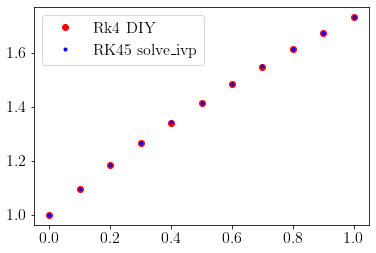

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp



hs = [0.1]

for h in hs:
    x = np.arange(0,1.01,h)
    n = len(x)
    y = np.zeros(n)
    y[0] = 1


     # 4阶 RK 方法
    f = lambda x,y: y - 2*x/y
    for i in range(0,n-1):

        K1 = f(x[i],y[i])
        K2 = f(x[i] + 0.5*h, y[i] + 0.5*h*K1)
        K3 = f(x[i] + 0.5*h, y[i] + 0.5*h*K2)
        K4 = f(x[i] + h,     y[i] +     h*K3)
        y[i+1] = y[i] + h*(K1 + 2*K2 + 2*K3 + K4)/6

    plt.plot(x, y, 'ro', label =  ' Rk4 DIY')

# y_real = (1+2*x)**0.5
# plt.plot(x,y_real, 'g.-', label  = 'exact solution')

model = lambda x,y: y - 2*x/y
x = np.arange(0,1.01,0.1)

sol = solve_ivp(model, t_span = (0,1), y0 = [1], method='RK45',t_eval= x)

#sol.resize(1,len(x))
plt.plot(sol.t, sol.y.T,'b.', label = 'RK45 solve_ivp')

plt.legend()

## 3. SIR Model
$$
\left\{
\begin{align*}
&\frac{\text{d}i}{\text{d}t} = \lambda si - \mu i, &i(0) = i_0\\
&\frac{\text{d}s}{\text{d}t} = -\lambda si, &s(0) = s_0
\end{align*}
\right.
$$

y(1)=[0.9831233]


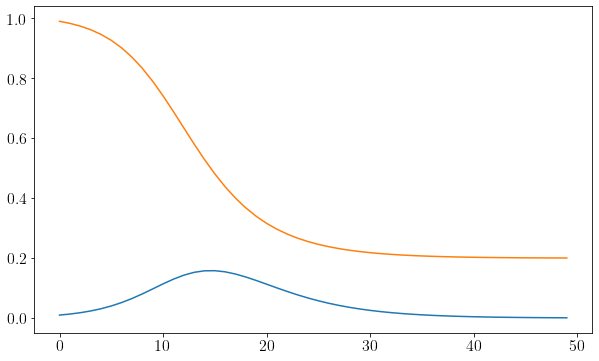

In [ ]:
# SIR Model
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

Lambda = 0.6
mu = 0.3
i0 = 0.01
s0 = 0.99

def fun(y, t):
    y0, y1 = y
    return np.array([Lambda*y1*y0 - mu*y0, -Lambda*y1*y0])

t = np.arange(0, 50, 1)
y = odeint(fun, [i0, s0], t)
print("y(1)={}".format(y[:, 1][np.where(t==1)]))

plt.figure(figsize=(10, 6))
plt.plot(t, y[:, 0], t, y[:, 1])
plt.show()

## 4. 时变SIR Model
$$
\left\{
\begin{aligned}
&\frac{\text{d}i}{\text{d}t} = \lambda(t) s(t)i(t) - \mu(t) i(t)\\
&\frac{\text{d}r}{\text{d}t} =  \mu(t) i(t)
\end{aligned}
\right.
\\
\left\{
\begin{aligned}
\lambda(t) &= (\Delta i(t) + \Delta r(t))/i(t)\\
\mu(t) &= \Delta r(t)/i(t)
\end{aligned}
\right.
$$

[ 0.25848742 -0.11871123]


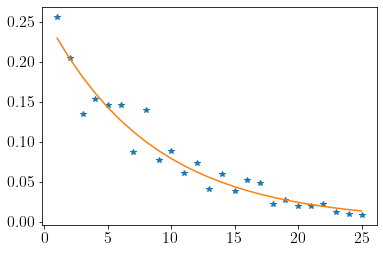

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

data=pd.read_excel("./data/数据文件5-1 SARS的传播.xlsx").values
# print(data)
r = data[:, -2] + data[:, -1]
i = data[:, 1] - data[:, -2] - data[:, -1]
# print(i)
delta_i = np.diff(i)
# print(delta_i)
delta_i_temp = delta_i[1: 26]
delta_r = np.diff(r)
delta_r_temp = delta_r[1: 26]
# print(delta_r)
Lambda = (delta_i_temp + delta_r_temp)/i[1: 26]
# print(Lambda)

t = np.arange(1, 26, 1)
fun = lambda t, a, b: a*np.exp(b*t)
popt, pcov = curve_fit(fun, t, Lambda)
print(popt)
# print("t=", t)
# print("Lambda=", Lambda)

y = fun(t, *popt)
plt.plot(t, Lambda, '*', t, y)
plt.show()

## 5. Logistic Model，差分近似

$$
\left\{
\begin{align*}
&\frac{\text{d}x}{\text{d}t} = r\left(1-\frac{x}{x_m}\right)x \\
&x(t_0) = x_0
\end{align*}
\right.
$$

$$
\frac{1}{x(k)} \cdot \frac{x(k+1)-x(k)}{\Delta t} = r - s \cdot x(k)
$$

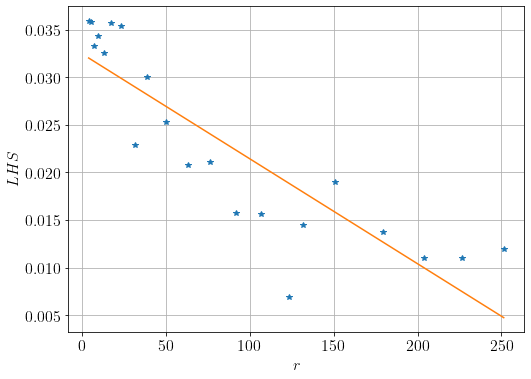

拟合系数：r = 0.03245185302569515, s = 0.00011023572385578718
------------------------------------------------------------ 
数值解预测
r = 0.0325
x_m = 294.3860
1790年：3.90百万人
1800年：5.37百万人
1810年：7.37百万人
1820年：10.10百万人
1830年：13.80百万人
1840年：18.75百万人
1850年：25.32百万人
1860年：33.91百万人
1870年：44.92百万人
1880年：58.71百万人
1890年：75.45百万人
1900年：95.03百万人
1910年：116.99百万人
1920年：140.44百万人
1930年：164.24百万人
1940年：187.17百万人
1950年：208.18百万人
1960年：226.57百万人
1970年：242.02百万人
1980年：254.57百万人
1990年：264.48百万人
2000年：272.14百万人
2010年：277.96百万人
2020年：282.33百万人
2030年：285.57百万人
2040年：287.96百万人
2050年：289.71百万人
2060年：290.99百万人
2070年：291.93百万人
2080年：292.60百万人
2090年：293.09百万人
2100年：293.45百万人
------------------------------------------------------------ 
差分方法预测预测
2000年:281.4
2010年:285.42829821615203
2020年:288.246782675292


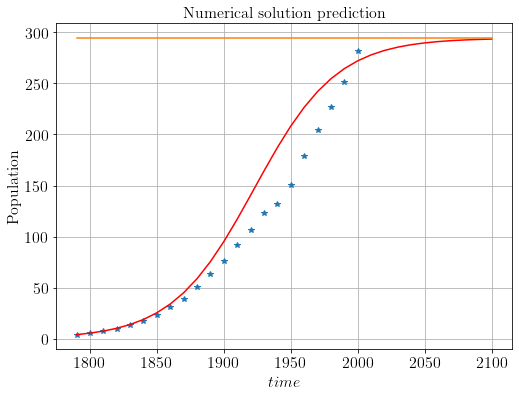

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import odeint

t = np.arange(1790, 2010, 10)
# print(t)
x = np.array([3.9, 5.3, 7.2, 9.6, 12.9, 17.1, 23.2, 31.4, 38.6, 50.2, 62.9, 76.0, 92.0, 106.5, 123.2, 131.7, 150.7, 179.3, 204.0, 226.5, 251.4, 281.4])
x_diff = np.diff(x)
LHS = x_diff/(x[0: -1]*10)
# print("LHS =", LHS)
fun = lambda x, r, s: r - s*x
popt, pcov = curve_fit(fun, x[0: -1], LHS)

plt.figure(figsize=(18, 6))
ax = plt.subplot(121)
plt.plot(x[0: -1], LHS, '*', x[0: -1], fun(x[0: -1], *popt))
plt.xlabel("$r$", size=16)
plt.ylabel("$LHS$", size=16 ,rotation=90)
plt.grid()
plt.show()
print("拟合系数：r = {}, s = {}".format(popt[0], popt[1]))

# 数值解预测
print('-'*60, "\n数值解预测")
t_forecast = np.arange(1790,2110,10)
r = popt[0]
x_m = popt[0]/popt[1]
print("r = {:.4f}".format(r))
print("x_m = {:.4f}".format(x_m))
y = odeint(lambda x, t: r*(1-x/x_m)*x, 3.9, t_forecast)
for i, j in enumerate(t_forecast):
    print("{}年：{:.2f}百万人".format(j, y[i][0]))

plt.rc('font', family='SimHei')
plt.figure(figsize=(18, 6))
plt.subplot(122)
plt.plot(t, x, '*', t_forecast, y, 'r', t_forecast, [x_m]*np.size(t_forecast, 0))
plt.xlabel("$time$", size=16)
plt.ylabel("Population", size=16 ,rotation=90)
plt.title("Numerical solution prediction", size=16)
plt.grid()

# 差分方法预测
print('-'*60, "\n差分方法预测预测")
x = 281.4
for i in np.arange(2000, 2021, 10):
    print("{}年:{}".format(i, x))
    x = (popt[0] - popt[1]*x)*x*10 + x

## 6.常微分方程的差分实例

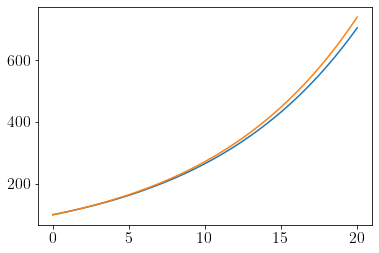

In [ ]:
from numpy import linspace, zeros, exp
import matplotlib.pyplot as plt

def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    u = zeros(N_t+1)
    t = linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f(u[n], t[n])
    return u, t

def demo_population_growth():
    """Test case: u'=r*u, u(0)=100."""
    def f(u, t):
        return 0.1*u

    u, t = ode_FE(f=f, U_0=100, dt=0.5, T=20)
    plt.plot(t, u, t, 100*exp(0.1*t))
    plt.show()

demo_population_growth()


## 7.微分方程稳定性简介

### 7.1 一阶微分方程的平衡点及稳定性
设有微分方程
$$
\dot{x}(t)=f(x) \tag{(1)}
$$
方程右端不显含自变量 $t$,称为**自治方程**.代数方程
$$
f(x)=0 \tag{(2)}
$$
的实根 $x=x_0$ 称为方程 (1) 的**平衡点** (或奇点). 它也是方程 (1) 的解 (奇解).
如果存在某个邻域,使方程 (1) 的解 $x(t)$ 从这个邻域内的某个 $x(0)$ 出发, 满足
$$
\lim _{t \rightarrow \infty} x(t)=x_0 \tag{(3)}
$$
则称平衡点 $x_0$ 是**稳定**的 (稳定性理论中称渐近稳定) ; 否则, 称 $x_0$ 是**不稳定**的 (不渐近稳定).
判断平衡点 $x_0$ 是否稳定通常有两种方法. 利用定义即 (3) 式称**间接法**. 不求方程 (1) 的解 $x(t)$, 因而不利用 (3) 式的方法称**直接法**.下面介绍直接法.
将 $f(x)$ 在 $x_0$ 点作 Taylor 展开, 只取一次项, 方程 (1) 近似为
$$
\dot{x}(t)=f^{\prime}\left(x_0\right)\left(x-x_0\right) \tag{(4)}
$$
(4) 称为 (1) 的近似线性方程, $x_0$ 也是方程 (4) 的平衡点. 关于 $x_0$ 点稳定性有如下的结论:
若 $f^{\prime}\left(x_0\right)<0$, 则 $x_0$ 对于方程 (4) 和 (1) 都是称稳定的;
若 $f^{\prime}\left(x_0\right)>0$, 则 $x_0$ 对于方程 $(4)$ 和 (1) 都是不稳定的.
$x_0$ 对于方程 (4) 的稳定性很容易由定义 (3) 证明, 因为若记 $f^{\prime}\left(x_0\right)=a$, 则 (4) 的一般解是
$$
x(t)=c \mathrm{e}^{a t}+x_0 \tag{(5)}
$$
其中 $c$ 是由初始条件决定的常数, 显然, 当 $a<0$ 时 (3) 式成立.
### 7.2 二阶微分方程的平衡点和稳定性
二阶微分方程可用两个一阶微分方程表为
$$
\left\{\begin{array}{l}
\dot{x}_1(t)=f\left(x_1, x_2\right) \\
\dot{x}_2(t)=g\left(x_1, x_2\right)
\end{array}\right. \tag{(6)}
$$
右端不显含 $t$, 是自治方程.代数方程组
$$
\left\{\begin{array}{l}
f\left(x_1, x_2\right)=0 \\
g\left(x_1, x_2\right)=0
\end{array}\right. \tag{(7)}
$$
的实根 $x_1=x_1^0, x_2=x_2^0$ 称为方程 (6) 的平衡点, 记作 $P_0\left(x_1^0, x_2^0\right)$.
如果存在某个邻域, 使方程 (6) 的解 $x_1(t), x_2(t)$ 从这个邻域内的某个 $\left(x_1(0), x_2(0)\right)$ 出发, 满足
$$
\lim _{t \rightarrow \infty} x_1(t)=x_1^0, \quad \lim _{t \rightarrow \infty} x_2(t)=x_2^0 \tag{(8)}
$$
则称平衡点 $P_0$ 是**稳定**的(渐近稳定); 否则, 称 $P_0$ 是**不稳定**的(不渐近稳定).
为了用直接法讨论方程 (6) 的平衡点的稳定性, 先看线性常系数方程
$$
\left\{\begin{array}{l}
\dot{x}_1(t)=a_1 x_1+a_2 x_2 \\
\dot{x}_2(t)=b_1 x_1+b_2 x_2
\end{array}\right. \tag{(9)}
$$
系数矩伡记作
$$
\boldsymbol{A}=\left[\begin{array}{ll}
a_1 & a_2 \\
b_1 & b_2
\end{array}\right] \tag{(10)}
$$
为研究方程 $(9)$ 的惟一平衡点 $P_0(0,0)$ 的稳定性, 假定 $A$ 的行列式
$$
\operatorname{det} A \neq 0 \tag{(11)}
$$
$P_0(0,0)$ 的稳定性由 $(9)$ 的特征方程
$$
\operatorname{det}(A-\lambda I)=0 \tag{(12)}
$$
的根 $\lambda$ (特征根) 决定.方程 (12) 可以写成脜加明晣的形式
$$
\left\{\begin{array}{l}
\lambda^2+p \lambda+q=0 \\
p=-\left(a_1+b_2\right) \\
q=\operatorname{det} A
\end{array}\right. \tag{(13)}
$$
将特征根记作 $\lambda_1, \lambda_2$, 则
$$
\lambda_1, \lambda_2=\frac{1}{2}\left(-p \pm \sqrt{p^2-4 q}\right) \tag{(14)}
$$
方程 (9) 的一般解具有形式 $c_1 \mathrm{e}^{\lambda_1^{\prime}}+c_2 \mathrm{e}^{\lambda 2^{\prime}}\left(\lambda_1 \neq \lambda_2\right)$ 或 $c_1 \mathrm{e}^{\lambda_1^{\prime}}+c_2 t \mathrm{e}^{\lambda_1^{\prime}}\left(\lambda_1=\lambda_2\right), c_1, c_2$ 为任意常数.按照稳定性的定义 (8) 式可知, 当 $\lambda_1, \lambda_2$ 为负数或存负实部时， $P_0(0,0)$ 是稳定平衡点; 而当 $\lambda_1, \lambda_2$ 有一个为正数或有正实部时, $P_0(0,0)$ 是不稳定平衡点.在条件(11)下 $\lambda_1, \lambda_2$ 不可能为 0 .
微分方程稳定性理论将平衡点分为结点、焦点、鞍点、中心等类型, 完全由特征根 $\lambda_1, \lambda_2$ 或相应的 $p, q$ 取值决定.表 1 简明地给出了这些结果, 表中最后一列 指按照定义 (8)式得到的关于稳定性的结论.\

表1 由特征方程决定的平衡点的类型和稳定性
\begin{array}{|c|c|c|c|}
\hline
\lambda_1, \lambda_2 & p, q & 平衡点类型 & 稳定性\\
\hline
\lambda_1 < \lambda_2 <0 & p>0, q>0, p^2>4q & 稳定结点 & 稳定\\
\hline
\lambda_1 > \lambda_2 > 0 & p<0, q>0, p^2>4q & 不稳定结点 & 不稳定\\
\hline
\lambda_1 < 0 < \lambda_2 & q<0 & 鞍点 & 不稳定\\
\hline
\lambda_1 = \lambda_2 <0 & p>0, q>0, p^2=4q & 稳定退化结点 & 稳定\\
\hline
\lambda_1 = \lambda_2 > 0 & p<0, q>0, p^2=4q & 不稳定退化结点 & 不稳定\\
\hline
\lambda_{1,2}=\alpha \pm \beta i, \alpha<0 & p>0, q>0, p^2<4q & 稳定焦点 & 稳定\\
\hline
\lambda_{1,2}=\alpha \pm \beta i, \alpha>0 & p<0, q>0, p^2<4q & 不稳定焦点 & 不稳定\\
\hline
\lambda_{1,2}=\alpha \pm \beta i, \alpha=0 & p=0, q>0 & 中心 & 不稳定\\
\hline
\end{array}
由表 1 可以看出, 根据特征方程的系数 $p, q$ 的正负很容易判断平衡点的稳定性, 准则如下:若
$$
p>0, q>0 \tag{(15)}
$$
则平衡点稳定；若
$$
p<0 \text { 或 } q<0 \tag{(16)}
$$
则平衡点不稳定.
以上是对线性方程 $(9)$ 的平衡点 $P_0(0,0)$ 稳定性的结论. 对于一般的非线性方程 (6), 可以用近似线性方法判断其平衡点 $P_0\left(x_1^0, x_2^0\right)$ 的稳定性. 在 $P_0$ 点将 $f\left(x_1, x_2\right)$ 和 $g\left(x_1, x_2\right)$ 作 Taylor 展开, 只取一次项,得 (6) 的近似线性方程
$$
\left\{\begin{array}{l}
\dot{x}_1(t)=f_{x_1}\left(x_1^0, x_2^0\right)\left(x_1-x_1^0\right)+f_{x_2}\left(x_1^0, x_2^0\right)\left(x_2-x_2^0\right) \\
\dot{x}_2(t)=g_{x_1}\left(x_1^0, x_2^0\right)\left(x_1-x_1^0\right)+g_{x_2}\left(x_1^0, x_2^0\right)\left(x_2-x_2^0\right)
\end{array}\right. \tag{(17)}
$$
系数矩阵记作
$$
\boldsymbol{A}=\left.\left[\begin{array}{ll}
f_{x_1} & f_{x_2} \\
g_{x_1} & g_{x_2}
\end{array}\right]\right|_{P_0\left(x_1^0 \cdot x_2^0\right)} \tag{(18)}
$$
特征方程系数为
$$
p=-\left.\left(f_{x_1}+g_{x_2}\right)\right|_{p_0}, \quad q=\operatorname{det} \boldsymbol{A} \tag{(19)}
$$
显然, $P_0$ 点对于方程 (17) 的稳定性由表 1 或准则 (15),（16) 决定, 而且已经证明了如下结论:
若方程 (17) 的特征根不为 0 或实部不为 0 , 则 $P_0$ 点对于方程 (6) 的稳定性与对于近似方程 (17) 的稳定性相同, 即由准则 (15), (16) 决定.
最后，提出以下几点值得注意：
1. 平衡点及其稳定性的概念只是对**自治方程** $(1)$ ，(6)而言才有意义.
2. 非线性方程 $(1),(6)$ 的平衡点的稳定性, 与相应的近似线性方程 (4), (17) 的平衡点的稳定性一致, 是在非临界情况下(即 $a \neq 0$, 或 $p, q \neq 0$ ) 得到的, 在临界情况下(即 $a=0$ 或 $p, q=0$ )二者可以不一致.
3. 在讨论平衡点稳定性时, 对初始点的要求是存在一个邻域, 这是**局部稳定**的定义.如果要求对任意的初始点,(3), (8)式成立, 称为**全局稳定**.对于线性方程, 局部稳定与全局稳定是等价的; 对于非线性方程, 二者不同.
4. 对于临界情况和非线性方程的全局稳定,可以用相轨线分析方法讨论.

# 六、偏微分方程

## 1. 波动方程

### 1.1 方程的导出与定解条件


#### 1.1.1 方程的导出
##### 模型假设
**将实际问题归结为数学模型时，必须作一些理想化的假设，以便抓住问题的最本质的特征**。
(1)弦是均匀的，弦的截面直径与弦的长度相比可以忽略，因此弦可以视为一根曲线，它的（线）密度$\rho$是常数。
(2)弦在某一平面内作微小横振动，即弦的位置始终在一直线段附近，而弦上各点均在同一平面内垂直于该直线的方向上作微小震动。$\Rightarrow$ $\frac{\partial u}{\partial x}$ 很小，可以忽略；$\sin \alpha = \tan \alpha = \frac{\partial u(x,t)}{\partial x}$
(3)弦是柔软的，它在形变时不抵抗弯曲，弦上各质点间的张力方向与弦的切线方向一致，且弦的伸长形变与张力的关系服从Hooke定律。\\
##### 原理
$$
$$\begin{align*}
作用在物体上的冲量 &= 该物体的动量的变化\\
\end{align*}$$
$$
若受垂直于$x$轴的外力（线）密度$F(x, t)$，并记$\frac{T}{\rho} = a^2$，则有
$$
$$\begin{align*}
\int_{t}^{t+\Delta t} \left[T\left[\frac{\partial u(x+\Delta x, t)}{\partial x}-\frac{\partial u(x, t)}{\partial x}\right] + \int_{x}^{x+\Delta} F(x, t) \mathrm{d} x \right] \mathrm{d} t &= \int_{x}^{x+\Delta x} \rho\left[\frac{\partial u(x, t+\Delta t)}{\partial t}-\frac{\partial u(x, t)}{\partial t}\right] \mathrm{d} x\\
\int_{t}^{t+\Delta t} \int_{x}^{x+\Delta x}\left[T \frac{\partial^{2} u(x, t)}{\partial x^{2}}-\rho \frac{\partial^{2} u(x, t)}{\partial t^{2}} + F(x, t)\right] \mathrm{d} x \mathrm{~d} t &= 0\\
T \frac{\partial^{2} u(x, t)}{\partial x^{2}}-\rho \frac{\partial^{2} u(x, t)}{\partial t^{2}} &= -F(x, t)\\
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=f(x, t)\\
\end{align*}$$
$$
其中，$f(x,t)=\frac{F(x,t)}{\rho}$表示单位质量在$x$点处所受的外力。

##### 弦振动方程
$$
$$\begin{align*}
\frac{\partial^{2} u}{\partial t^{2}} &= a^{2} \frac{\partial^{2} u}{\partial x^{2}} + f(x, t)\\
\frac{\partial^{2} u}{\partial t^{2}} &= a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)+f(x, y, t) \\
\frac{\partial^{2} u}{\partial t^{2}} &= a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}+\frac{\partial^{2} u}{\partial z^{2}}\right)+f(x, y, z, t)
\end{align*}$$
$$

#### 1.1.2 定解条件
初始条件与边界条件总称为定解条件。
##### 一维波动方程边界条件
$$\begin{align*}
u(0,t)=0,u(l,t)=0
\end{align*}$$

##### 一维波动方程初始条件
$$\begin{align*}
u(x,0)=\phi(x),\frac{\partial u(x,0)}{\partial t} = \psi(x) (0 \leqslant x \leqslant l)
\end{align*}$$


#### 1.1.3 一维波动方程定解问题
$$\begin{cases}
\frac{\partial^{2} u}{\partial t^{2}} = a^{2} \frac{\partial^{2} u}{\partial x^{2}} + f(x, t)\\
t=0: u = \phi(x), \frac{\partial u}{\partial t} = \psi(x)\\
x=0: u=0\\
x=l: u=0
\end{cases}$$

#### 1.1.4 偏微分方程三类定解条件
（1）第一类定解条件：又称Dirichlet边界条件。e.g. $u(0,t)=0, u(l,t)=0$
（2）第二类定解条件：又称Neumann边界条件。e.g. $\frac{\partial u}{\partial x}| _{x=0}=\mu(t)$
（3）第三类定解条件：e.g. $\left(\frac{\partial u}{\partial x}+\sigma u\right)|_{x=0 \text{ or } l}=v(t)$，其中$\sigma=\frac{k}{T}$为已知正数。

#### 1.1.4 定解问题适的适定性
（1）解的存在性问题
（2）解的唯一性问题
（3）解的稳定性问题
若一个定解问题的解是存在的、唯一的、稳定的，那么我们称这个问题是适定的。
除了研究定解问题的适定性以外，在数学物理方程中还经常研究的问题有解的正则性（光滑性）、解的渐进性（包括衰减性）、求解方法（包括精确解、渐近解与数值解的求解方法）等。

### 1.2 初值问题的达朗贝尔公式、波的传播

弦振动方程的达朗贝尔解法（又称为传播波法\行波法）。
当弦振动方程为初值问题时，即不考虑边界条件：
$$(★)
\begin{cases}
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=f(x, t) \quad(t>0,-\infty<x<+\infty) \\
t=0: u=\varphi(x), \frac{\partial u}{\partial t}=\psi(x) \quad(-\infty<x<+\infty)
\end{cases}
$$

由叠加原理可知，问题等价于（分解为）下面两个初值问题

$$
\text{（I）}\begin{cases}
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=0 \\
t=0: u=\varphi(x), \frac{\partial u}{\partial t}=\psi(x)
\end{cases}
$$

$$
\text{（II）}\begin{cases}
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=f(x, t) \\
t=0: u=0, \frac{\partial u}{\partial t}=0
\end{cases}
$$

##### (0)齐次方程通解（不考虑初始条件）
齐次方程
$$
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=0
$$
的通解为
$$
u(x, t) = F(x-at)+G(x+at)
$$

##### (1)初值问题（I）的求解（方程齐次，初始非齐次）
通过变量替换$\xi = x - at, \eta = x + at$,
$$u(x, t)=\frac{\varphi(x-a t)+\varphi(x+a t)}{2}+\frac{1}{2 a} \int_{x-a t}^{x+a t} \psi(\alpha) \mathrm{d} \alpha$$
这个公式称为达朗贝尔公式。
**Theorem:** 设$\phi(x) \in C^2(\mathrm{R}),\psi(x) \in C^1(\mathrm{R})$，那么初值问题(I)存在唯一的解$u(x,t)$，它由达朗贝尔公式给出。

##### (2)一端固定的半无界弦的自由振动问题的求解
$$\begin{cases}
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=0 \quad(t>0,0<x<\infty) \\
t=0: u=\varphi(x), \frac{\partial u}{\partial t}=\psi(x)(0 \leqslant x<\infty) \\
x=0: u=0
\end{cases}$$
通过奇延拓的方式与达朗贝尔公式可求得问题解
$$
u(x, t)=
\begin{cases}\frac{1}{2}[\varphi(x+a t)+\varphi(x-a t)]+\frac{1}{2 a} \int_{x-a t}^{x+a t} \psi(\xi) \mathrm{d} \xi & (x \geqslant a t) \\ \frac{1}{2}[\varphi(x+a t)-\varphi(a t-x)]+\frac{1}{2 a} \int_{a t-x}^{x+a t} \psi(\xi) \mathrm{d} \xi & (0 \leqslant x<a t)
\end{cases}
$$

为了使$u(x,t)$具有二阶连续偏导数，函数$\phi(x)$与$\psi(x)$应当满足条件
$$\varphi(0)=\varphi^{\prime \prime}(0)=0, \quad \psi^{\prime}(0)=0$$
该条件称为相容性条件。

##### (3)初值问题（II）的求解（方程非齐次，初始齐次）
齐次化原理（又称Duhamel原理）：
记$W(x,t;\tau)$为齐次方程的定解问题

$$\begin{cases}
\frac{\partial^{2} W}{\partial t^{2}}-a^{2} \frac{\partial^{2} W}{\partial x^{2}}=0 \quad(t>\tau) \\
t=\tau: W=0, \frac{\partial W}{\partial t}=f(x, \tau)
\end{cases}$$
的解，则初值问题（II）的解为
$$u(x, t)=\int_{0}^{t} W(x, t ; \tau) \mathrm{d} \tau$$

由达朗贝尔公式，有
$$W(x, t ; \tau)=\frac{1}{2 a} \int_{x-a t^{\prime}}^{x+a t^{\prime}} f(\xi, \tau) \mathrm{d} \xi=\frac{1}{2 a} \int_{x-a(t-\tau)}^{x+a(t-\tau)} f(\xi, \tau) \mathrm{d} \xi$$
从而
$$u(x, t) =\frac{1}{2 a} \int_{0}^{t} \int_{x-a(t-\tau)}^{x+a(t-\tau)} f(\xi, \tau) \mathrm{d} \xi \mathrm{d} \tau
=\frac{1}{2 a} \iint_{G} f(\xi, \tau) \mathrm{d} \xi \mathrm{d} \tau
$$

##### (4)一般方程(★)的解（方程非齐次，初始非齐次）
由叠加原理，方程(★)的解为
$$
u(x, t)=\frac{\varphi(x-a t)+\varphi(x+a t)}{2}+\frac{1}{2 a} \int_{x-a t}^{x+a t} \psi(\alpha) \mathrm{d} \alpha + \frac{1}{2 a} \int_{0}^{t} \int_{x-a(t-\tau)}^{x+a(t-\tau)} f(\xi, \tau) \mathrm{d} \xi \mathrm{d} \tau
$$


### 1.3 初边值问题的分离变量法
分离变量法又称Fourier方法、驻波法。

##### 1.3.1 方程非齐次、初始非齐次、边界齐次
考察波动方程的初边值问题：
$$\begin{cases}
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=f(x, t) \\
t=0: u=\varphi(x), \frac{\partial u}{\partial t}=\psi(x) \\
x=0: u=0 \\
x=l: u=0
\end{cases}$$

利用叠加原理，上处初边值问题可以分解为下面两个初边值问题：
$$
\text{（I）}\begin{cases}
\frac{\partial^{2} u_{1}}{\partial t^{2}}-a^{2} \frac{\partial^{2} u_{1}}{\partial x^{2}}=0, \\
t=0: u_{1}=\varphi(x), \frac{\partial u_{1}}{\partial t}=\psi(x) \\
x=0 \text { 和 } x=l: u_{1}=0 ;
\end{cases}
$$

$$
\text{（II）}\begin{cases}
\frac{\partial^{2} u_{2}}{\partial t^{2}}-a^{2} \frac{\partial^{2} u_{2}}{\partial x^{2}}=f(x, t) \\
t=0: u_{2}=0, \frac{\partial u_{2}}{\partial t}=0, \\
x=0 \text { 和 } x=l: u_{2}=0,
\end{cases}
$$

而且显然有
$$u = u_1 + u_2$$
正如像1.1.2中一样，(II)的求解可以归结为(I)的求解，所以关键求(I)的解。

###### 方程齐次、初始非齐次、边值齐次(I)的求解

利用分离变量法$u(x,t)=X(x)T(t)$，可求得(I)的解为：
$$u(x, t)=\sum_{k=1}^{\infty}\left(A_{k} \cos \frac{k \pi a}{l} t+B_{k} \sin \frac{k \pi a}{l} t\right) \sin \frac{k \pi}{l} x$$
其中，$A_k$和$\frac{B_k k \pi a}{l}$分别是$\phi(x)$和$\psi(x)$在$[0,l]$区间中正弦展开的Fourier级数的系数，即
$$\begin{cases}
A_{k}=\frac{2}{l} \int_{0}^{l} \varphi(\xi) \sin \frac{k \pi}{l} \xi \mathrm{d} \xi \\
B_{k}=\frac{2}{k \pi a} \int_{0}^{l} \psi(\xi) \sin \frac{k \pi}{l} \xi \mathrm{d} \xi
\end{cases}$$
###### 定解问题（I）相容性条件
若函数 $\varphi(x) \in C^{3}, \psi(x) \in C^{2}$, 并且
$$
\varphi(0)=\varphi(l)=\varphi^{\prime \prime}(0)=\varphi^{\prime \prime}(l)=\psi(0)=\psi(l)=0
$$
则弦振动方程的定解问题(I)的解是存在的, 它可以由上面级数给出.

###### 方程非齐次、初始齐次、边界齐次(II)的求解
齐次化原理：若$W(x,t;\tau)$是初边值问题
$$\begin{cases}
\frac{\partial^{2} W}{\partial t^{2}}-a^{2} \frac{\partial^{2} W}{\partial x^{2}}=0 \quad(t>\tau) \\
t=\tau: W=0, \frac{\partial W}{\partial t}=f(x, \tau) \\
x=0 \text { 和 } x=l: W=0
\end{cases}$$
的解（其中$\tau \geqslant 0$为参数），则
$$
u(x,t) = \int_0^t W(x,t;\tau) \mathrm{d} \tau
$$
就是初边值问题（II）的解。

下求$W(x,t;\tau)$:
令$t' = t - \tau$，上方程组化为
$$\begin{cases}
\frac{\partial^{2} W}{\partial t^{2}}-a^{2} \frac{\partial^{2} W}{\partial x^{2}}=0 \quad\left(t^{\prime}>0\right) \\
t^{\prime}=0: W=0, \frac{\partial W}{\partial t^{\prime}}=f(x, \tau) \\
x=0 \text { 和 } x=l: W=0
\end{cases}$$
该初边值问题（满足形式I）的解为
$$
\begin{aligned}
W =W(x, t ; \tau) &= \sum_{k=1}^{\infty} B_{k}(\tau) \sin \frac{k \pi a}{l} t^{\prime} \sin \frac{k \pi}{l} x \\
&=\sum_{k=1}^{\infty} B_{k}(\tau) \sin \frac{k \pi a}{l}(t-\tau) \sin \frac{k \pi}{l} x,
\end{aligned}
$$
而
$$
B_{k}(\tau)=\frac{2}{k \pi a} \int_{0}^{l} f(\xi, \tau) \sin \frac{k \pi}{l} \xi \mathrm{d} \xi
$$
从而，初边值问题（II）的解为
$$
u(x, t)=\int_{0}^{t} W(x, t ; \tau) \mathrm{d} \tau=\sum_{k=1}^{\infty} \int_{0}^{t} B_{k}(\tau) \sin \frac{k \pi a}{l}(t-\tau) \mathrm{d} \tau \cdot \sin \frac{k \pi}{l} x
$$
###### 定解问题（II）相容性条件

可证明：在$f(x,t) \in C^2$以及在端点满足条件
$$
f(0, t)=f(l, t)=0
$$
的假设下，这确实为定解问题（II）的解。

##### 1.3.2 方程非齐次、初始非齐次、边界非齐次
$$\begin{cases}
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=f(x, t) \\
t=0: u=\varphi(x), \frac{\partial u}{\partial t}=\psi(x) \\
x=0: u=\mu_{1}(t) \\
x=l: u=\mu_{2}(t)
\end{cases}$$

这里，设函数 $\mu_{1}(t)$, $\mu_{2}(t)$ 具有二阶连续导数，且 $\mu_{1}(0)=\mu_{2}(0)=\mu^{\prime}_{1}(0)=\mu^{\prime}_{2}(0)=\mu^{\prime \prime}_{1}(0)=\mu^{\prime \prime}_{2}(0)=0$.
可通过适当变换把**边界条件**化为其次的情形。令
$$
U(x, t)=\mu_{1}(t)+\frac{x}{l}\left(\mu_{2}(t)-\mu_{1}(t)\right)
$$
再作变换
$$
V(x, t)=u(x, t)-U(x, t)
$$
则$V(x,t)$满足方程
$$
\frac{\partial^{2} V}{\partial t^{2}}-a^{2} \frac{\partial^{2} V}{\partial x^{2}}=f(x, t)-\mu_{1}^{\prime \prime}(t)-\frac{x}{l}\left(\mu_{2}^{\prime \prime}(t)-\mu^{\prime \prime}{ }_{1}(t)\right)
$$
和非齐次初始条件
$$
t=0:
\begin{cases}
V=\varphi(x)-\mu_{1}(0)-\frac{x}{l}\left(\mu_{2}(0)-\mu_{1}(0)\right) := \varphi_1(x)\\
\frac{\partial V}{\partial t}=\psi(x)-\mu_{1}^{\prime}(0)-\frac{x}{l}\left(\mu_{2}^{\prime}(0)-\mu^{\prime}{ }_{1}(0)\right) := \psi_1(x).
\end{cases}
$$
和边值条件
$$
\varphi_{1}(0)=\varphi_{1}(l)=\varphi_{1}^{\prime \prime}(0)=\varphi_{1}^{\prime \prime}(l)=\psi_{1}(0)=\psi_{1}(l)=0
$$
且 $f_{1}(0, t)=f_{1}(l, t)=0$,满足相容性条件，由此转化为初边值问题。

### 1.4 高维波动方程的柯西问题

#### 1.4.1 膜振动方程的导出

从本节起讨论高维波动方程. 首先以膜振动问题为例导出二维波动方程. 所谓膜是指弹性固体薄片, 与弦振动的情形相仿, 在考虑它的振动时我们作以下几个**基本假设**：
（1）膜的厚度很小,从而可以视为一张曲面.膜是均匀的,它的面密度 $\rho$ 是常数.
（2）膜的平衡位置在一平面内, 膜上各点在垂直这一平面的方向上作微小振动, 膜所受到的 外力均与该平面垂直.
（3）膜是柔软的, 它对弯曲变形不会产生任何抵抗力.
将膜的平衡位置置于平面 $O x y$ 中, 以 $u(x, y, t)$ 记膜在 $(x, y)$ 处在时刻 $t$ 的位移, 可以用类似于推导弦振动方程的方法来推导膜振动方程.
对于一个紧张着的薄膜, 若它满足上面的基本假设, 则在薄膜上任一点的张力 $\boldsymbol{T}$ 是常值（可以证明）. 这时, 若过薄膜上指定点 $P$ 沿某一方向作一个截口 $l$, 则该薄膜位于 $l$ 两侧的部分分别对于对方有单位强度为 $T$ 的拉力, 拉力的方向与曲面法向垂直, 又与 $l$ 方向相垂直.
于是, 为推导膜振动方程, 在膜上任取一小块 $\Delta$ 来进行分析. 记 $\Delta$ 在 $O x y$ 平面上的投影为 $\Omega$, 以下来计算在时间段 $(t, t+\Delta t)$ 内作用于膜块 $\Delta$ 的冲量以及该时间段内这一小块膜的动量变化.
先考察作用在 $\Delta$ 的**边界上的张力**. 设 $\lambda$ 为 $\Delta$ 的边界, 它在 $O x y$ 平面的投影为 $\Gamma$. 以 $\tau$ 表示曲线 $\lambda$ 的切线方向, $\boldsymbol{v}$ 表示 $\Delta$ 的法线方向, $\boldsymbol{s}$ 表示曲线 $\Gamma$ 的切线方向, $\boldsymbol{n}$ 表示 $O x y$ 平面上 $\Gamma$ 的法线方向. 因此张力 $\boldsymbol{T}$ 的方向与 $\tau \times \boldsymbol{v}$ 的方向一致. 膜的位移用 $u(x, y, t)$ 表示, $\Delta$ 的方程为 $u=$ $u(x, y, t)$, 曲面法线 $\boldsymbol{v}$ 的方向可以取为 $\left(-u_{x},-u_{y}, 1\right)$.
现在考察方向 $\tau$, 因为 $s$ 的方向为
$$
(\cos (x, s), \cos (y, s), 0),
$$
故 $\tau$ 的方向可以取为
$$
\left(\cos (x, s), \cos (y, s), \frac{\partial u}{\partial s}\right)
$$
所以 $\tau \times v$ 的方向可取为 $\left(\alpha_{1}, \alpha_{2}, \alpha_{3}\right)$,其中
$$
\begin{aligned}
&\alpha_{1}=\cos (y, s)+\frac{\partial u}{\partial s} u_{y}, \\
&\alpha_{2}=-\cos (x, s)-\frac{\partial u}{\partial s} u_{x}, \\
&\alpha_{3}=u_{x} \cos (y, s)-u_{y} \cos (x, s)=u_{x} \cos (x, n)+u_{y} \cos (y, n)=\frac{\partial u}{\partial n} .
\end{aligned}
$$
由此可知, 张力 $T$ 在垂直向上方向的分量是
$$
\boldsymbol{T}_{u}=T \frac{\alpha_{3}}{\sqrt{\alpha_{1}^{2}+\alpha_{2}^{2}+\alpha_{3}^{2}}} .
$$
由于 $u_{x}, u_{y}$ 以及 $\frac{\partial u^{\partial}}{\partial s}$ 都是小量, 故忽略高阶小量, 有 $\boldsymbol{T}_{u} \approx T \frac{\partial u}{\partial \boldsymbol{n}}$.
根据以上的分析知, 沿着曲线 $\lambda$, 张力的合力为
$$
\int_{\Gamma} T \frac{\partial u}{\partial n} \mathrm{~d} s,
$$
而在面积 $\Delta$ 上**膜所受外力的合力**为
$$
\iint_{\Omega} F(x, y, t) \mathrm{d} x \mathrm{~d} y,
$$
所以在时间段 $(t, t+\Delta t)$ 内作用于 $\Delta$ 的冲量为
$$
\int_{t}^{t+\Delta t}\left[\int_{\Gamma} T \frac{\partial u}{\partial \boldsymbol{n}} \mathrm{d} s+\iint_{\Omega} F(x, y, t) \mathrm{d} x \mathrm{~d} y\right] \mathrm{d} t .
$$
又在这个时间段内膜块 $\Delta$ 的动量变化为
$$
\iint_{\Omega}\left[\rho \frac{\partial u}{\partial t}(x, y, t+\Delta t)-\rho \frac{\partial u}{\partial t}(x, y, t)\right] \mathrm{d} x \mathrm{~d} y .
$$
因此得到
$$
\begin{aligned}
& \int_{t}^{t+\Delta t}\left[\int_{\Gamma} T \frac{\partial u}{\partial \boldsymbol{n}} \mathrm{d} s+\iint_{\Omega} F(x, y, t) \mathrm{d} x \mathrm{~d} y\right] \mathrm{d} t \\
=& \iint_{\Omega}\left[\rho \frac{\partial u}{\partial t}(x, y, t+\Delta t)-\rho \frac{\partial u}{\partial t}(x, y, t)\right] \mathrm{d} x \mathrm{~d} y .
\end{aligned}
$$
假设 $u$ 关于 $x, y$ 的二阶偏导数都连续, 利用格林 (Green)公式可得
$$
\int_{t}^{t+\Delta t} \iint_{\Omega}\left\{T\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)+F(x, y, t)-\rho \frac{\partial^{2} u}{\partial t^{2}}\right\} \mathrm{d} x \mathrm{~d} y \mathrm{~d} t=0 .
$$
由于时间区间段与空间区域 $\Omega$ 的任意性, 由上式就得到膜振动方程
$$
\rho \frac{\partial^{2} u}{\partial t^{2}}=T\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)+F(x, y, t) .
$$
记 $\frac{T}{\rho}=a^{2}, \frac{F}{\rho}=f$, 就得到膜振动方程的**标准形式**
\begin{equation}
\frac{\partial^{2} u}{\partial t^{2}}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)+f
\tag{(1)}
\end{equation}
其中 $f$ 称为方程的**自由项**. 受外力 $F$ 的振动称为**强迫振动**. 因此这样的方程也称为**膜的强迫振动方程**. 当 $f=0$ 时, 方程是齐次的, 此时的方程为
\begin{equation}
\frac{\partial^{2} u}{\partial t^{2}}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)
\tag{(2)}
\end{equation}
称为**膜的自由振动方程**. 方程 (1)及 (2)也称为**二维波动方程**.

#### 1.4.2 定解条件的提法

膜振动方程的定解条件同样有**边界条件**和**初始条件**两种.
和弦振动的情形一样, 在初始条件的提法中单有初始位移 $u(x, y, 0)$ 是不够的, 因为对两个 相同的膜, 如果它们的初始位移相同, 但一个有初始速度, 而另一个在初始时是静止的, 那么它们 的运动情形就不会一样. 因此对膜振动方程, **初始条件**的提法通常为
$$
\left\{\begin{array}{l}
u(x, y, 0)=\varphi(x, y), \\
\frac{\partial u}{\partial t}(x, y, 0)=\psi(x, y),
\end{array}\right.
$$
其中 $\varphi(x, y)$ 及 $\psi(x, y)$ 为已知函数.
类似于弦振动方程的情形, 对于膜振动方程的**边界条件**的提法, 通常也有三种:
(1) 膜的边界固定或依照一已知函数随时间而变化. 此时边界条件的提法为
$$
\left.u(x, y, t)\right|_{\Gamma}=0
$$
或
$$
\left.u(x, y, t)\right|_{\Gamma}=\mu(x, y, t)
$$
其中 $\Gamma$ 为薄膜的边界在 $O x y$ 平面上的投影曲线, $\mu(x, y, t)$ 为已知函数. 这种边界条件称为**第一类边界条件**.
(2) 薄膜的边界可以在一个光滑的柱面上自由滑动, 不受摩擦力的作用. 此时边界条件的提 法为
$$
\left.\frac{\partial u}{\partial \boldsymbol{n}}\right|_{\Gamma}=0,
$$
或更一般地为
$$
\left.\frac{\partial u}{\partial \boldsymbol{n}}\right|_{\Gamma}=\mu(x, y, t),
$$
其中 $\mu(x, y, t)$ 为已知函数. 这种边界条件称为**第二类边界条件**.
(3) 将膜固定在弹性支承上, 此时, 边界条件归结为
$$
\left.\left(\frac{\partial u}{\partial \boldsymbol{n}}+\sigma u\right)\right|_{\Gamma}=0,
$$
其中 $\sigma$ 为已知正数. 也可以考虑更普遍的边界条件
$$
\left.\left(\frac{\partial u}{\partial \boldsymbol{n}}+\sigma u\right)\right|_{\Gamma}=\mu(x, y, t),
$$
其中 $\mu(x, y, t)$ 为已知函数. 这种边界条件称为**第三类边界条件**.
对于膜振动方程, 同样可以提柯西问题, 此时所给的初始条件为
$$
\left\{\begin{array}{l}
u(x, y, 0)=\varphi(x, y), \\
\frac{\partial u}{\partial t}(x, y, 0)=\psi(x, y), \quad-\infty<x, y<\infty .
\end{array}\right.
$$
又考察电磁波或声波在空间中传播时, 我们会得到非齐次的三维波动方程
$$
\frac{\partial^{2} u}{\partial t^{2}}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}+\frac{\partial^{2} u}{\partial z^{2}}\right)+f(x, y, z, t),
$$
或齐次的三维波动方程
$$
\frac{\partial^{2} u}{\partial t^{2}}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}+\frac{\partial^{2} u}{\partial z^{2}}\right) .
$$
它的边界条件与初始条件的提法也是同上面类似的.


#### 1.4.3 球平均法
下面我们考察高维波动方程柯西问题的求解. 先考察三维波动方程的柯西问题
$$
\left\{\begin{array}{l}
\frac{\partial^{2} u}{\partial t^{2}}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}+\frac{\partial^{2} u}{\partial z^{2}}\right), \\
\left.u\right|_{t=0}=\varphi(x, y, z),\left.\frac{\partial u}{\partial t}\right|_{t=0}=\psi(x, y, z) .
\end{array}\right.
$$
首先我们考虑一个特殊情形, 即如果初始资料 $\varphi(x, y, z), \psi(x, y, z)$ 具有球对称性的情形.这时, $\varphi$ 与 $\psi$ 仅为变量 $r=\sqrt{x^{2}+y^{2}+z^{2}}$ 的函数, 我们可寻求只依赖于 $t$ 与 $r$ 的解 $u=$ $u(r, t)$. 这样, 波动方程可以写成
\begin{equation}
\frac{\partial^{2} u}{\partial t^{2}}=a^{2}\left(\frac{\partial^{2} u}{\partial r^{2}}+\frac{2}{r} \frac{\partial u}{\partial r}\right) .
\tag{(3)}
\end{equation}
与一维波动方程相比, (3)多了一阶导数项, 但如果将 $v=r u$ 取为末知函数, (3) 又可写成
$$
\frac{\partial^{2} v}{\partial t^{2}}=a^{2} \frac{\partial^{2} v}{\partial r^{2}},
$$
它与一维波动方程的形成完全相同, 从而我们可以利用达朗贝尔公式来求得该初值问题的具球对称形式的解.
对于一般初始资料的柯西问题的求解, 情形要复杂得多. 受上面讨论的启发, 我们可以用**球平均法**来求一般情形下柯西问题的解. 球平均法的主要想法是引入一个关于 $u(x, y, z, t)$ 在具有不同球心、不同半径的球面上的平均值函数 $M_{u}$, 建立 $M_{u}$ 所满足的偏微分方程与相应的柯西问题, 而后者恰好是比较容易求解的, 然后通过 $M_{u}$ 得到 $u$ 的表达式. 球平均法首先由泊松(Poisson)引人, 后来弗里茨约翰 (Fritz John) 将这一方法作了很大的发展.
为了以后的公式写起来方便, 我们也常用 $\left(x_{1}, x_{2}, x_{3}\right)$ 来记坐标 $(x, y, z)$. 设 $h\left(x_{1}, x_{2}, x_{3}\right)$ 是在整个空间上连续且有直到二阶连续偏导数的任意函数, 考虑函数 $h$ 在以 $\left(x_{1}, x_{2}, x_{3}\right)$ 为心，以 $r$ 为半径的球面 $S_{r}$ 上的平均值
$$
M_{h}\left(x_{1}, x_{2}, x_{3}, r\right)=\frac{1}{4 \pi r^{2}} \iint_{S_{r}} h \mathrm{~d}_{r} \sigma,
$$
其中 $\mathrm{d}_{r} \sigma$ 表示球面 $S_{r}$ 上的面积微元.
**引理1** $4.1$ 设 $h \in C^{2}$, 则其球平均函数 $M_{h}\left(x_{1}, x_{2}, x_{3}, r\right)$ 也是二次连续可导的, 且满足方程
$$
\left(\frac{\partial^{2}}{\partial r^{2}}+\frac{2}{r} \frac{\partial}{\partial r}\right) M_{h}\left(x_{1}, x_{2}, x_{3}, r\right)=\Delta M_{h}\left(x_{1}, x_{2}, x_{3}, r\right)
$$
$\left( \text{其中} \Delta=\sum_{i=1}^{3} \frac{\partial^{2}}{\partial x_{i}^{2}}\right)$ 与初始条件
\begin{equation}
\left.M_{h}\right|_{r=0}=h\left(x_{1}, x_{2}, x_{3}\right),\left.\quad \frac{\partial M_{h}}{\partial r}\right|_{r=0}=0 .
\tag{(4)}
\end{equation}
**证明** 略
由于 $M_{h}$ 满足 (4), 故将 $M_{h}$ 往 $r<0$ 作偶延拓后, 仍有 $M_{h} \in C^{2}$.
现设 $u\left(x_{1}, x_{2}, x_{3}, t\right)$ 是该柯西问题的解, 对它关于 $x_{1}, x_{2}, x_{3}$ 作球平均函数
\begin{equation}
M_{u}\left(x_{1}, x_{2}, x_{3}, r, t\right)=\frac{1}{4 \pi} \iint_{S_{1}} u\left(x_{1}+r \alpha_{1}, x_{2}+r \alpha_{2}, x_{3}+r \alpha_{3}, t\right) \mathrm{d} \omega,
\tag{(5)}
\end{equation}
我们有
**引理2** 设 $u\left(x_{1}, x_{2}, x_{3}, t\right)$ 是柯西问题的解, 则由 (5) 定义的 $M_{u}$ 作为 $r, t$ 的 函数, 满足方程
\begin{equation}
\frac{\partial^{2} M_{u}}{\partial t^{2}}-a^{2}\left(\frac{\partial^{2}}{\partial r^{2}}+\frac{2}{r} \frac{\partial}{\partial r}\right) M_{u}=0
\tag{(6)}
\end{equation}
与初始条件
$$\begin{align*}
&\left.M_{u}\right|_{t=0}=M_{\varphi}\left(x_{1}, x_{2}, x_{3}, r\right), \tag{(7)}\\
&\left.\frac{\partial M_{u}}{\partial t}\right|_{t=0}=M_{\psi}\left(x_{1}, x_{2}, x_{3}, r\right) \tag{(8)}.
\end{align*}$$
**证** 略
将 $M_{u}\left(x_{1}, x_{2}, x_{3}, r, t\right)$ (相应地 $M_{\varphi}$ 及 $M_{\psi}$ )往 $r<0$ 方向作偶延拓, 则它在 $-\infty<r<\infty, t$ $\geqslant 0$ 上仍满足 (6)-(8). 于是, 视 $x_{1}, x_{2}, x_{3}$ 为参数, $v\left(x_{1}, x_{2}, x_{3}, r, t\right)=$ $r M_{u}\left(x_{1}, x_{2}, x_{3}, r, t\right)$ 满足
$$
\begin{aligned}
&\frac{\partial^{2} v}{\partial t^{2}}-a^{2} \frac{\partial^{2} v}{\partial r^{2}}=0, \\
&\left\{\begin{array}{l}
\left.v\right|_{t=0}=r M_{\varphi}\left(x_{1}, x_{2}, x_{3}, r\right), \\
\left.v_{t}\right|_{t=0}=r M_{\psi}\left(x_{1}, x_{2}, x_{3}, r\right),
\end{array}\right.
\end{aligned}
$$
于是 $v$ 可以由达朗贝尔公式解出. 从而 $M_{u}=\frac{1}{r} v$, 再令 $r \rightarrow 0$ 就可得到 $u\left(x_{1}, x_{2}, x_{3}, t\right)$.
**定理1** 设 $\varphi \in C^{3}, \psi \in C^{2}$, 那么三维波动方程的柯西问题存在唯一的解
\begin{equation}
u(x, y, z, t)=\frac{\partial}{\partial t}\left(\frac{1}{4 \pi a^{2} t} \iint_{s_{a t}^{M}} \varphi \mathrm{d} S\right)+\frac{1}{4 \pi a^{2} t} \iint_{s_{a t}^{M}} \psi \mathrm{d} S,
\tag{(9)}
\end{equation}
其中 $S_{a t}^{M}$ 表示以点 $M(x, y, z)$ 为球心、$at$ 为半径的球面, $\mathrm{d} S$ 为球面的面积微元. (9)式称为泊松公式.
**证** 略

## 2. 热传导方程
本章介绍最典型的抛物型方程——热传导方程. 在研究热传导、扩散等物理现象时都会遇到这类方程.在 $2.1$ 中介绍方程与定解问题的提法, 在 $2.2$ 中介绍用分离变量法来求解初边值问题, 在 $2.3$ 中介绍用傅里叶变换解柯西问题的方法, 在 $2.4$ 中讨论各类定解问题解的唯一性与稳定性, 在 $2.5$ 中讨论当 $t$ 趋于无穷时解的渐近性态. 本章中有关的论证一般只对一个空间变量的方程进行, 至于多个空间变量的情形, 其论证是完全类似的.


### 2.1 热传导方程及其定解问题的导出
#### 2.1.1 热传导方程的导出
考察空间某物体 $G$ 的热传导问题. 以函数 $u(x, y, z, t)$ 表示物体 $G$ 在位置 $(x, y, z)$ 及时刻 $t$ 的温度.
依据传热学中的**傅里叶实验定律**, 物体在无穷小时段 $\mathrm{d} t$ 内沿法线方向 $\boldsymbol{n}$ 流过一个无穷小面积 $\mathrm{d} S$ 的热量 $\mathrm{d} Q$ 与物体温度沿曲面 $\mathrm{d} S$ 法线方向的方向导数 $\frac{\partial u}{\partial n}$ 成正比, 即
\begin{equation}
\mathrm{d} Q=-k(x, y, z) \frac{\partial u}{\partial n} \mathrm{~d} S \mathrm{~d} t,
\tag{(1)}
\end{equation}
其中 $k(x, y, z)$ 称为物体在点 $(x, y, z)$ 处的**热传导系数**, 它应取正值. (1)式中负号的出现是由于热量总是从温度高的一侧流向低的一侧, 因此, $\mathrm{d} Q$ 应和 $\frac{\partial u}{\partial n}$ 异号.
在物体 $G$ 内任取一闭曲面 $\Gamma$, 它所包围的区域记为 $\Omega$, 由 (1) 式, 从时刻 $t_{1}$ 到 $t_{2}$ 流进此闭曲面的全部热量为
\begin{equation}
Q=\int_{t_{1}}^{t_{2}}\left[\iint_{\Gamma} k(x, y, z) \frac{\partial u}{\partial n} \mathrm{~d} S\right] \mathrm{d} t,
\tag{(2)}
\end{equation}
这里 $\frac{\partial u}{\partial n}$ 表示 $u$ 沿 $\Gamma$ 上单位外法线方向 $n$ 的方向导数.
流入的热量使物体内部温度发生变化, 在时间间隔 $\left(t_{1}, t_{2}\right)$ 中物体温度从 $u\left(x, y, z, t_{1}\right)$ 变化到 $u\left(x, y, z, t_{2}\right)$, 它所应该吸收的热量是
$$
\iiint_{\Omega} c(x, y, z) \rho(x, y, z)\left[u\left(x, y, z, t_{2}\right)-u\left(x, y, z, t_{1}\right)\right] \mathrm{d} x \mathrm{~d} y \mathrm{~d} z,
$$
其中 $c$ 为比热, $\rho$ 为密度. 因此就成立
\begin{equation}
\int_{t_{1}}^{t_{1}} \iint_{\Gamma} k \frac{\partial u}{\partial n} \mathrm{~d} S \mathrm{~d} t=\iint_{\Omega} c \rho\left[u\left(x, y, z, t_{2}\right)-u\left(x, y, z, t_{1}\right)\right] \mathrm{d} x \mathrm{~d} y \mathrm{~d} z .
\tag{(3)}
\end{equation}
假设函数 $u$ 关于变量 $x, y, z$ 具有二阶连续偏导数, 关于 $t$ 具有一阶连续偏导数, 利用格林公式, 可以把(3)式化为
$$
\begin{aligned}
& \int_{t_{1}}^{t_{2}} \iiint_{\Omega}\left[\frac{\partial}{\partial x}\left(k \frac{\partial u}{\partial x}\right)+\frac{\partial}{\partial y}\left(k \frac{\partial u}{\partial y}\right)+\frac{\partial}{\partial z}\left(k \frac{\partial u}{\partial z}\right)\right] \mathrm{d} x \mathrm{~d} y \mathrm{~d} z \mathrm{~d} t \\
=& \iiint_{\Omega} c \rho\left(\int_{t_{1}}^{t_{2}} \frac{\partial u}{\partial t} \mathrm{~d} t\right) \mathrm{d} x \mathrm{~d} y \mathrm{~d} z,
\end{aligned}
$$
交换积分次序, 就得到
$$
\int_{t_{1}}^{t_{2}} \iiint_{\Omega}\left[c \rho \frac{\partial u}{\partial t}-\frac{\partial}{\partial x}\left(k \frac{\partial u}{\partial x}\right)-\frac{\partial}{\partial y}\left(k \frac{\partial u}{\partial y}\right)-\frac{\partial}{\partial z}\left(k \frac{\partial u}{\partial z}\right)\right] \mathrm{d} x \mathrm{~d} y \mathrm{~d} z \mathrm{~d} t=0 .
$$
由于 $t_{1}, t_{2}$ 与区域 $\Omega$ 都是任意的, 我们得到
\begin{equation}
c \rho \frac{\partial u}{\partial t}=\frac{\partial}{\partial x}\left(k \frac{\partial u}{\partial x}\right)+\frac{\partial}{\partial y}\left(k \frac{\partial u}{\partial y}\right)+\frac{\partial}{\partial z}\left(k \frac{\partial u}{\partial z}\right) .
\tag{(5)}
\end{equation}
(5)式称为**非均匀的各向同性体的热传导方程**. 如果物体是均匀的, 此时 $k, c$ 及 $\rho$ 均为常数, 记 $\frac{k}{c \rho}=a^{2}$, 即得
\begin{equation}
\frac{\partial u}{\partial t}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}+\frac{\partial^{2} u}{\partial z^{2}}\right) .
\tag{(6)}
\end{equation}
如果所考察的物体内部有热源 (例如物体中通有电流, 或有化学反应等情况), 则在热传导方程的推导中还需考虑热源的影响. 若设在单位时间内单位体积中所产生的热量为 $F(x, y, z, t)$, 则在考虑热平衡时, (3)式左边应再加上一项
$$
\int_{t_{1}}^{t_{2}} \iiint_{\Omega} F(x, y, z, t) \mathrm{d} x \mathrm{~d} y \mathrm{~d} z \mathrm{~d} t,
$$
于是, 相应于 (6) 的热传导方程应改为
\begin{equation}
\frac{\partial u}{\partial t}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}+\frac{\partial^{2} u}{\partial z^{2}}\right)+f(x, y, z, t),
\tag{(7)}
\end{equation}
其中
$$
f(x, y, z, t)=\frac{F(x, y, z, t)}{\rho c} .
$$
(6)称为**齐次热传导方程**, 而 (7)称为**非齐次热传导方程**.


#### 2.1.2 定解问题的提法
从物理学角度来看, 如果知道了物体在边界上的温度状况 (或热交换状况)和物体在初始时刻的温度, 就可以完全确定物体在以后时刻的温度. 因此热传导方程最自然的一个定解问题就是在已给的初始条件与边界条件下求问题的解.
初始条件的提法显然为
$$
u(x, y, z, 0)=\varphi(x, y, z),
$$
其中 $\varphi(x, y, z)$ 为已知函数, 表示物体在 $t=0$ 时的温度分布.
现在考察边界条件的提法. 最简单的情形为物体的表面的温度是已知的, 这条件的数学形式为
$$
\left.u(x, y, z, t)\right|_{(x, y, z) \in \Gamma}=g(x, y, z, t),
$$
其中 $\Gamma$ 表示物体的边界曲面, $g(x, y, z, t)$ 是定义在 $(x, y, z) \in \Gamma, 0 \leqslant t \leqslant T$ 上的已知函数. 这种边界条件称为热传导方程的**第一类边界条件** (又称狄利克雷 (Dirichlet)边界条件).
我们再考察另一种情况: 在物体的表面上知道的不是它的表面温度而是热量在表面各点的流速, 也就是说在表面各点的单位面积上在单位时间内所流过的热量 $Q$ 是已知的. 根据傅里叶定律
$$
\frac{\mathrm{d} Q}{\mathrm{dSd} t}=-k \frac{\partial u}{\partial n}
$$
就可明白, 这种边界条件实际上表示温度 $u$ 在表面上的法向导数是已知的. 这条件的数学形式为
$$
\left.\frac{\partial u}{\partial n}\right|_{(x, y, z) \in \Gamma}=g(x, y, z, t),
$$
这里 $\frac{\partial u}{\partial n}$ 表示 $u$ 沿边界 $\Gamma$ 上的单位外法线方向 $n$ 的方向导数, 而 $g(x, y, z, t)$ 是定义在 $(x, y, z)$ $\in \Gamma, 0 \leqslant t \leqslant T$ 的已知函数. 这种边界条件称为热传导方程的**第二类边界条件** (又称诺伊曼 ( $\operatorname{Neumann})$ 边界条件).
今考察物体放在介质(例如空气)中的情形: 我们能测量到的只是与物体接触处的介质温度 $u_{1}$, 它与物体表面上的温度 $u$ 往往并不相同. 在 $u_{1}$ 已知时研究边界条件的提法还必须利用物理中另一个热传导实验定律 (牛顿定律) : 从物体流到介质中的热量和两者的温度差成正比:
$$
\mathrm{d} \boldsymbol{Q}=k_{1}\left(u-u_{1}\right) \mathrm{d} S \mathrm{~d} t,
$$
这里的比例常数 $k_{1}$ 称为**热交换系数**, 它也取正值. 考察流过物体表面 $\Gamma$ 的热量, 从物体内部一侧来看它应由傅里叶定律确定, 而从物体与介质接触面的热传导规律来看, 它应由牛顿定律所决定, 因此成立着关系式
$$
-k \frac{\partial u}{\partial n} \mathrm{~d} S \mathrm{~d} t=k_{1}\left(u-u_{1}\right) \mathrm{d} S \mathrm{~d} t,
$$
即
$$
k_{1} u+k \frac{\partial u}{\partial n}=k_{1} u_{1} .
$$
由于 $k_{1}$ 及 $k$ 都是正数, 因此这种边界条件可以写成
$$
\left.\left(\frac{\partial u}{\partial n}+\sigma u\right)\right|_{(x, y, z) \in \Gamma}=g(x, y, z, t),
$$
这里 $\frac{\partial u}{\partial n}$ 表示 $u$ 沿边界 $\Gamma$ 上的单位外法线方向 $n$ 的方向导数,而 $g(x, y, z, t)$ 是定义在 $(x, y, z)$ $\in \Gamma, 0 \leqslant t \leqslant T$ 上的已知函数, $\sigma$ 为已知正数. 这种边界条件称为热传导方程的**第三类边界条件**.
和弦振动方程比较, 这三类边界条件虽然从不同的物理角度分别归结出来, 但在数学上的形式却完全一样.
又如果所考察的**物体体积很大**, 而所需知道的只是在较短时间和较小范围内的温度变化情况, 边界条件所产生的影响可以忽略, 这时就不妨把所考察的物体视为充满整个空间, 而定解问题就成为**柯西问题**, 此时的初始条件为
$$
u(x, y, z, 0)=\varphi(x, y, z) \quad(-\infty<x, y, z<\infty)
$$
**我们在此特别指出, 与波动方程的情形不同, 对于热传导方程的定解问题,初始条件只能给出一个.**
在适当情况下,方程中描述空间坐标的独立变量的数目还可以减少. 例如**当物体是均匀细杆时, 假如它的侧面是绝热的, 也就是说在侧面不产生热交换**, 又假定温度的分布在同一截面相同的,则温度函数 $u$ 仅与坐标 $x$ 及时间 $t$ 有关, 我们就得到**一维热传导方程**
$$
\frac{\partial u}{\partial t}=a^{2} \frac{\partial^{2} u}{\partial x^{2}} .
$$
同样, 如考虑薄片的热传导, 薄片的侧面绝热, 可得**二维热传导方程**
$$
\frac{\partial u}{\partial t}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right) .
$$
对于这种低维的热传导方程, 也可以提出前述的柯西问题与初边值问题.

#### 2.1.3 扩散方程
在研究分子扩散过程中也会遇到类似的方程. 例如气体的扩散, 液体的渗透, 半导体材料中的杂质扩散等. 下面, 我们来导出扩散过程所必须满足的数学方程.
在扩散问题中, 人们最关心的是所扩散物质的浓度, 它表示单位体积中所扩散物质的质量. 由于扩散方程与热传导方程的导出极为相似, 我们不准备重复这一过程. 只要将扩散过程所满足 的物理规律与热传导过程所满足的物理规律作个类比, 扩散方程就不难写出.
在推导热传导方程的过程中起基本作用的是傅里叶定律与热量守恒定律 (即 (1)式与 (3)式):
$$
\begin{gathered}
\mathrm{d} Q=-k(x, y, z) \frac{\partial u}{\partial n} \mathrm{~d} S \mathrm{~d} t, \\
\int_{t_{1}}^{t_{2}} \iint_{\Gamma} k \frac{\partial u}{\partial n} \mathrm{~d} S \mathrm{~d} t=\iiint_{\Omega} c \rho\left[u\left(x, y, z, t_{2}\right)-u\left(x, y, z, t_{1}\right)\right] \mathrm{d} x \mathrm{~d} y \mathrm{~d} z,
\end{gathered}
$$
其中诸量的意义前已说明. 在考虑扩散过程时, 我们遇到的是相应的扩散定律与质量守恒定律, 它们的形式是
$$
\mathrm{d} m=-D(x, y, z) \frac{\partial N}{\partial n} \mathrm{d} S \mathrm{d} t \tag{(17)}
$$
$$
\int_{t_{1}}^{t_{2}} \iint_{\Gamma} D \frac{\partial N}{\partial n} \mathrm{d} S \mathrm{d} t=\iiint_{\Omega}\left[N\left(x, y, z, t_{2}\right)-N\left(x, y, z, t_{1}\right)\right] \mathrm{d} x \mathrm{d} y \mathrm{d} z \tag{(18)}
$$
其中 $N$ 表示扩散物质的浓度, $\mathrm{d} m$ 表示在无穷小时段 $\mathrm{d} t$ 内沿法线方向 $n$ 经过一个无穷小面积 $\mathrm{d} S$ 的扩散物质的质量, 式中 $D(x, y, z)$ 称为**扩散系数**, 它总取正值其它符号与 (1)、(3)中 的意义相同.
将 (17)、(18)与(1)、(3) 比较, 可见其形式是极其类似的. 在考察热传导过程中引人的量 $Q, u, k$ 分别相应于扩散过程中的量 $m, N, D$, 而出现在 (3) 式中的因子 $c \rho$ 在扩散问题中相应于常数 1. 于是, 我们立刻可以写出扩散方程为
$$
\frac{\partial N}{\partial t}=\frac{\partial}{\partial x}\left(D \frac{\partial N}{\partial x}\right)+\frac{\partial}{\partial y}\left(D \frac{\partial N}{\partial y}\right)+\frac{\partial}{\partial z}\left(D \frac{\partial N}{\partial z}\right) \tag{(19)}
$$
如果 $D$ 是常数, 记 $D=a^{2}$, 扩散方程 (19) 就化为与热传导方程(6)完全相同的形式.
对于扩散方程, 也可以提出相应的柯西问题与初边值问题等定解问题.

#### 2.1.4 习题
一均匀细杆直径为$l$，假设它在同一截面上的温度是相同的，杆的表面和周围介质发生热交换，并服从规律
$$
\mathrm{d}Q = k_1 (u-u_1) \mathrm{d}S \mathrm{d}t
$$
又假设杆的密度为$\rho$，比热为$c$，热传导系数为$k$，试导出此时温度$u$满足的方程。

**解** 引坐标系: 以杆的对称轴为 $x$ 轴, 此时杆的温度为 $u=u(x, t)$。记杆的截面面积 $\frac{\pi l^{2}}{4}$ 为 $S$。由假设, 在任意时刻 $t$ 到 $t+\Delta t$ 内流入截面坐标为 $x$ 到 $x+\Delta x$ 一小段细杆的热量为
$$
d Q_{1}=\left.k \frac{\partial u}{\partial x}\right|_{x+\Delta x} s \Delta t-\left.k \frac{\partial u}{\partial x}\right|_{x} s \Delta t=\left.k \frac{\partial^{2} u}{\partial x^{2}}\right|_{x} s \Delta x \Delta t
$$
杆表面和周围介质发生热交换, 可看作一个 “被动” 的热源。由假设, 在时刻 $t$ 到 $t+\Delta t$ 在截面为 $x$ 到 $x+\Delta x$ 一小段中产生的热量为
$$
d Q_{2}=-k_{1}\left(u-u_{1}\right) \pi l \Delta x \Delta t=-\frac{4 k_{1}}{l}\left(u-u_{1}\right) s \Delta x \Delta t
$$
又在时刻 $t$ 到 $t+\Delta t$ 在截面为 $x$ 到 $x+\Delta x$ 这一小段内由于温度变化所需的热量为
$$
d Q_{3}=c \rho[u(x, t+\Delta t)-u(x, t)] s \Delta x=\left.c \rho \frac{\partial u}{\partial t}\right|_{t} s \Delta x \Delta t
$$
由热量守恒原理得:
$$
\left.c \rho \frac{\partial u}{\partial t}\right|_{t} s \Delta x \Delta t=\left.k \frac{\partial^{2} u}{\partial x^{2}}\right|_{x} s \Delta x \Delta t-\frac{4 k_{1}}{l}\left(u-u_{1}\right) s \Delta x \Delta t
$$
消去 $s \Delta x \Delta t$, 再令 $\Delta x \rightarrow 0, \Delta t \rightarrow 0$ 得精确的关系:
$$
c \rho \frac{\partial u}{\partial t}=k \frac{\partial^{2} u}{\partial x^{2}}-\frac{4 k_{1}}{l}\left(u-u_{1}\right)
$$
或
$$
\frac{\partial u}{\partial t}=\frac{k}{c \rho} \frac{\partial^{2} u}{\partial x^{2}}-\frac{4 k_{1}}{c \rho l}\left(u-u_{1}\right)=a^{2} \frac{\partial^{2} u}{\partial x^{2}}-\frac{4 k_{1}}{c \rho l}\left(u-u_{1}\right)
$$
其中
$$
a^{2}=\frac{k}{c \rho}
$$

### 2.2 初边值问题的分离变量法

#### 2.2.1 一个空间变量的情形
在第一章中我们用分离变量法求得了波动方程初边值问题的解. 这一方法对于热传导方程初边值问题的求解也是适用的. 对于热传导方程的初边值问题, 初始条件只需给一个条件, 这也体现在分离变量法的求解过程中. 以下以热传导方程在边界上分别取第一与第三边界条件的初边值问题为例详细讨论其求解过程. 我们将看到, 由于引人第三边界条 件, 求解过程的运算与讨论变得较复杂, 但其基本步骤仍相仿.
我们用分离变量法求解如下的初边值问题:
$$
\left\{
\begin{array}{l}
u_{t}-a^{2} u_{x x}=0 \quad(t>0,0<x<l), \quad(1) \\
t=0: u=\varphi(x), \quad(2)\\
x=0: u=0, \quad(3)\\
x=l: u_{x}+h u=0, \quad(4)
\end{array}\right.
$$
其中 $h$ 为正常数.
用分离变量法求解. 令
$$
u(x, t)=X(x) T(t)
$$
这里 $X(x)$ 和 $T(t)$ 分别表示仅与 $x$ 有关和仅与 $t$ 有关的函数. 把它代人方程, 得到
$$
X T^{\prime}=a^{2} X^{\prime \prime} T
$$
即
$$
\frac{T^{\prime}}{a^{2} T}=\frac{X^{\prime \prime}}{X}
$$
这等式只有在两边均等于常数时才成立. 令此常数为 $-\lambda$, 则有
$$
\begin{gathered}
T^{\prime}+\lambda a^{2} T=0, \quad(5)\\
X^{\prime \prime}+\lambda X=0, \quad(6)
\end{gathered}
$$
先考虑 (6) . 根据边界条件 (3)、(4), $X(x)$ 应当满足边界条件
$$
X(0)=0, \quad X^{\prime}(l)+h X(l)=0
$$
对于边值问题 (6)、(7), 与波动方程类似的讨论可得
(i) 当 $\lambda \leqslant 0$ 时, 只有平凡解 $X \equiv 0$;
(ii) 当 $\lambda>0$ 时,
$$
X(x)=A \cos \sqrt{\lambda} x+B \sin \sqrt{\lambda} x
$$
利用边界条件 $X(0)=0$, 得 $A=0$. 于是由 (7) 的第二个边界条件得到
$$
B(\sqrt{\lambda} \cos \sqrt{\lambda} l+h \sin \sqrt{\lambda} l)=0
$$
为使 $X(x)$ 为非平凡解, $\lambda$ 应满足
$$
\sqrt{\lambda} \cos \sqrt{\lambda} l+h \sin \sqrt{\lambda} l=0
$$
即 $\lambda$ 应是下述超越方程的正解:
$$
\tan \sqrt{\lambda} l=-\frac{\sqrt{\lambda}}{h} \tag{(11)}
$$
令
$$
v=\sqrt{\lambda} l,
$$
则 (11)式变为
$$
\tan v=-\frac{v}{l h}
$$
利用图解法或数值求解法可得出这个方程的根. 由下图知, 方程 (2.13)有可列无穷
![](./images/热传导方程分离变量法图解.png)
多个正根 $v_{k}>0(k=1,2, \cdots)$, 满足 $\left(k-\frac{1}{2}\right) \pi<v_{k}<k \pi$. 因此, 特征值问题 $(6) 、(7)$ 存在着无穷多个**固有值**
$$
\lambda_{k}=\left(\frac{v_{k}}{l}\right)^{2} \quad(k=1,2, \cdots)
$$
及相应的**固有函数**
$$
X_{k}(x)=B_{k} \sin \sqrt{\lambda_{k}} x=B_{k} \sin \frac{v_{k}}{l} x \quad(k=1,2, \cdots)
$$
把 $\lambda=\lambda_{k}$ 代人方程 (2.5), 可得
$$
T_{k}(t)=C_{k} \mathrm{e}^{-a^{2} \lambda_{k} t} \quad(k=1,2, \cdots) .
$$
于是得到一列可分离变量的特解
$$
u_{k}(x, t)=A_{k} \mathrm{e}^{-a^{2} \lambda_{k} t} \sin \sqrt{\lambda_{k}} x \quad(k=1,2, \cdots)
$$
由于方程 (1) 及边界条件 (3)、(4)都是齐次的, 故可利用叠加原理构造级数形式的解.
$$
u(x, t)=\sum_{k=1}^{\infty} A_{k} \mathrm{e}^{-a^{2} \lambda_{k} t} \sin \sqrt{\lambda_{k}} x \tag{(18)}
$$
以下来决定常数 $A_{k}$, 使 $(18)$ 满足初始条件 $(2)$.
由 (2), 为使在 $t=0$ 时 $u(x, t)$ 取到初值 $\varphi(x)$, 应成立
$$
\varphi(x)=\sum_{k=1}^{\infty} A_{k} \sin \sqrt{\lambda_{k}} x \tag{(19)}
$$
为确定系数 $A_{k}$, 须先证明固有函数系 $\left\{X_{k}\right\}=\left\{\sin \sqrt{\lambda_{k}} x\right\}$ 在 $[0, l]$ 上正交. 设固有函数 $X_{n}$ 和 $X_{m}$ 分别对应于不同的固有值 $\lambda_{n}$ 和 $\lambda_{m}$, 即
$$
X_{n}^{\prime \prime}+\lambda_{n} X_{n}=0, \quad X_{m}^{\prime \prime}+\lambda_{m} X_{m}=0
$$
以 $X_{m}$ 和 $X_{n}$ 分别乘上面第一式和第二式, 得到
$$
\begin{aligned}
&X_{m} X_{n}^{\prime \prime}+\lambda_{n} X_{m} X_{n}=0, \\
&X_{n} X_{m}^{\prime \prime}+\lambda_{m} X_{m} X_{n}=0 .
\end{aligned}
$$
两式相减后在 $[0, l]$ 上积分, 有
$$
\int_{0}^{l}\left(X_{m} X_{n}^{\prime \prime}-X_{n} X_{m}^{\prime \prime}\right) \mathrm{d} x+\left(\lambda_{n}-\lambda_{m}\right) \int_{0}^{l} X_{n} X_{m} \mathrm{~d} x=0 .
$$
再利用 $X_{n}$ 和 $X_{m}$ 都满足边界条件 (3), (4), 就得到
$$
\left(\lambda_{n}-\lambda_{m}\right) \int_{0}^{l} X_{n} X_{m} \mathrm{~d} x=\left.\left(X_{n} X_{m}^{\prime}-X_{m} X_{n}^{\prime}\right)\right|_{0} ^{l}=0 .
$$
由于 $\lambda_{n} \neq \lambda_{m}$, 故得固有函数系的正交性:
$$
\int_{0}^{l} X_{n} X_{m} \mathrm{~d} x=\int_{0}^{l} \sin \sqrt{\lambda_{n}} x \sin \sqrt{\lambda_{m}} x \mathrm{~d} x=0, \quad m \neq n \tag{(20)}
$$
记
$$
\begin{aligned}
M_{k} &=\int_{0}^{l} \sin ^{2} \sqrt{\lambda_{k}} x \mathrm{~d} x=\int_{0}^{l} \frac{1-\cos 2 \sqrt{\lambda_{k}} x}{2} \mathrm{~d} x \\
&=\frac{l}{2}-\frac{\sin 2 \sqrt{\lambda_{k}} l}{4 \sqrt{\lambda_{k}}}=\frac{l}{2}-\frac{1}{2 \sqrt{\lambda_{k}}} \frac{\tan \sqrt{\lambda_{k}} l}{1+\tan ^{2} \sqrt{\lambda_{k}} l} \\
&=\frac{l}{2}-\frac{-\frac{v_{k}}{l h}}{2 \frac{v_{k}}{l}\left(1+\frac{v_{k}^{2}}{l^{2} h^{2}}\right)}=\frac{l}{2}+\frac{h}{2\left(h^{2}+\lambda_{k}\right)}
\end{aligned}
$$
于是, 在 (19)两边乘以 $\sin \sqrt{\lambda_{k}} x$, 再进行积分, 利用正交性 $(20)$ 即可得
$$
A_{k}=\frac{1}{M_{k}} \int_{0}^{l} \varphi(\xi) \sin \sqrt{\lambda}_{k} \xi \mathrm{d} \xi
$$
将它代人 (18)式, 就得到初边值问题 (1)-(4)的**形式解**为
$$
u(x, t)=\sum_{k=1}^{\infty} \frac{1}{M_{k}} \int_{0}^{l} \varphi(\xi) \sin \sqrt{\lambda_{k}} \xi \mathrm{d} \xi \cdot \mathrm{e}^{-a^{2} \lambda_{k} t} \sin \sqrt{\lambda_{k}} x \tag{(23)}
$$
为了考察由分离变量法得到的形式解是否是初边值问题 (1)-(4)的经典解, 还得进行验证. 以下证明, 当 $\varphi(x)$ 为**有界函数**时, 由 (23) 式给出的形式解, 当 $t>0$ 时, 关于 $x$ 及 $t$ 是任意次连续可导的, 并且满足方程 (1) 及边界条件 (3)、(4).
事实上, 与第一章波动方程情形有很大不同, 表达式 (23) 中含有因子 $\mathrm{e}^{-a^{2} \lambda_{k} t}$, 因此对任意 $\delta>0$, 当 $t \geqslant \delta$ 时, 对任意 $p>0$ 级数 $\sum_{k=1}^{\infty} \lambda_{k}^{p} \mathrm{e}^{-a^{2} \lambda_{k} t}$ 均是**一致收敛**的. 而由 $\varphi$ 为有界函数的假设 $(|\varphi(x)| \leqslant M)$ 及 (21)式,可得
$$
\left|\int_{0}^{l} \varphi(\xi) \sin \sqrt{\lambda}_{k} \xi \mathrm{d} \xi\right| \leqslant M l \text { 及 } \frac{1}{M_{k}} \leqslant \frac{2}{l}
$$
因而, 由 (23) 表示的级数, 当 $t>0$ 时, 关于 $x$ 及 $t$ 是无穷次可导的, 并且求导与求和可以交换. 由于级数的每一项都满足方程 (1) 及边界条件 (3)、(4), 从而 (23) 式表示的级数在 $t>0$ 时确实满足方程及边界条件. 为了保证当 $t \rightarrow 0$ 时, 对任意的 $x \in[0, l]$, 由 (23) 式给出的级数趋于初值 $\varphi(x)$, 还需要对 $\varphi(x)$ 加上进一步的条件. 例如在 $\varphi(x) \in C^{2}, \varphi(0)=0, \varphi^{\prime}(l)+$ $h \varphi(l)=0$ 时, 可以证明, 由 (23) 式给出的级数确实是初边值问题 (1) - (4) 的经典解. 关于此点的详细证明, 此处从略.


#### 2.2.2. 圆形区域上的热传导问题
我们再举一例子, 研究圆柱形区域或两侧绝热的圆板上的热传导问题. 设侧边的温度保持为常数, 此时热传导问题可以归结为求解下述的定解问题:
$$
\left\{\begin{array}{l}
\frac{\partial u}{\partial t}=\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}} \\
u(x, y, 0)=\varphi(x, y), \\
\left.u\right|_{x^{2}+y^{2}=R^{2}}=0
\end{array}\right.
$$
用分离变量法解这个问题.

#### 2.2.3 习题
**习题1** 如果有一长度为 $l$ 的均匀的细棒, 其周围以及两端 $x=0, x=l$ 均为绝热, 初始温度分布为 $u(x, 0)=f(x)$, 问以后时刻的温度分布如何? 且证明当 $f(x)$ 等于常数 $u_{0}$ 时, 恒有$u(x, t)=u_0$
**解** 即定解问题
$$
\left\{\begin{array}{l}
\frac{\partial u}{\partial t}=a^{2} \frac{\partial^{2} u}{\partial x^{2}} \\
\left.\frac{\partial u}{\partial x}\right|_{x=0}=\left.\frac{\partial u}{\partial x}\right|_{x=l}=0 \\
u(x,t)=f(x)
\end{array}\right.
$$
设 $u=X(x) T(t)$ 代入方程及边值得
$$
\left\{\begin{array}{l}
X^{\prime \prime}+\lambda X=0, \quad X^{\prime}(0)=X^{\prime}(l)=0 \\
T^{\prime}+a^{2} \lambda T=0
\end{array}\right.
$$
求非零解 $X(x)$ :
(1) 当 $\lambda<0$ 时, 通解为
$$
\begin{aligned}
&X(x)=A e^{\sqrt{-\lambda} x}+B e^{-\sqrt{-\lambda} x} \\
&X^{\prime}(x)=A \sqrt{-\lambda} e^{\sqrt{-\lambda} x}-B \sqrt{-\lambda} e^{-\sqrt{-\lambda} x}
\end{aligned}
$$
由边值得
$$
\left\{\begin{array}{l}
A \sqrt{-\lambda}-B \sqrt{-\lambda}=0 \\
A \sqrt{-\lambda} e^{\sqrt{-\lambda}}-B \sqrt{-\lambda} e^{-\sqrt{-\lambda l}}=0
\end{array}\right.
$$
因 $\sqrt{-\lambda} \neq 0$ 故相当于 $\left\{\begin{array}{l}A-B=0 \\ A e^{\sqrt{-\lambda l}}-B e^{-\sqrt{-\lambda l}}=0\end{array}\right.$
视 $A, B$ 为未知数, 此为一齐次线性代数方程组, 要 $X(x)$ 非零, 必需不同为零, 即 此齐次线性代数方程组要有非零解, 由代数知必需有
$$
\begin{aligned}
&\left|\begin{array}{cc}
1 & -1 \\
e^{\sqrt{-\lambda l}} & -e^{-\sqrt{-\lambda l}}
\end{array}\right|=0 \\
&\left|\begin{array}{cc}
1 & -1 \\
e^{\sqrt{-\lambda l}} & -e^{-\sqrt{-\lambda l}}
\end{array}\right|=e^{\sqrt{-\lambda l}}-e^{-\sqrt{-\lambda l}} \neq 0
\end{aligned}
$$
因 $l>0, \sqrt{-\lambda}>0, e^{x}$ 为单调增函数之故。因此没有非零解 $X(x)$ 。
(2) 当 $\lambda=0$ 时, 通解为
$$
X(x)=a x+b
$$
$$
X^{\prime}(x)=a
$$
由边值得 $X^{\prime}(0)=X^{\prime}(l)=a=0$
即 $b$ 可任意, 故 $X(x) \equiv 1$ 为一非零解。
(3) 当 $\lambda>0$ 时, 通解为
$$
\begin{aligned}
&X(x)=A \cos \sqrt{\lambda} x+B \sin \sqrt{\lambda} x \\
&X^{\prime}(x)=-A \sqrt{\lambda} \sin \sqrt{\lambda} x+B \sqrt{\lambda} \cos \sqrt{\lambda} x \\
&X^{\prime}(0)=B \sqrt{\lambda}=0 \\
&X^{\prime}(l)=-A \sqrt{\lambda} \sin \sqrt{\lambda} l+B \sqrt{\lambda} \cos \sqrt{\lambda} l=0
\end{aligned}
$$
由边值得
因 $\sqrt{\lambda} \neq 0$, 故相当于
$$
\left\{
\begin{array}{l}
B=0 \\
A \sin \sqrt{\lambda} l=0
\end{array}\right.
$$
要 $X(x)$ 非零, 必需 $A \neq 0$, 因此必需 $\sin \sqrt{\lambda} l=0$, 即
$$\sqrt{\lambda}=\frac{n \pi}{l} \quad(n$ 整数 $)$$
这时对应 $\quad X(x)=\cos \frac{n \pi}{l} x($ 取 $A=1)$
从而
$$
X_{n}(x)=\cos \frac{n \pi}{l} x, n=1,2, \cdots \cdots
$$
对应于 $\lambda=0, X_{0}(x)=1$, 解 $T$ 得 $T_{0}(t)=C_{0}$
对应于 $\lambda=\left(\frac{n \pi}{l}\right)^{2}, X_{n}(x)=\cos \frac{n \pi}{l} x$, 解 $T$ 得 $T_{n}(t)=C_{n} e^{-\left(\frac{a n \pi}{l}\right)^{2} t}$ 由迭加性质, 解为
$$
u(x, t)=C_{0}+\sum_{n=1}^{\infty} C_{n} e^{-\left(\frac{a n \pi}{l}\right)^{2} t} \cos \frac{n \pi}{l} x
$$
$$
=\sum_{n=0}^{\infty} C_{n} e^{-\left(\frac{a n \pi}{l}\right)^{2} t} \cdot \cos \frac{n \pi}{l} x
$$
由始值得
$$
f(x)=\sum_{n=0}^{\infty} C_{n} \cos \frac{n \pi}{l} x
$$
因此 $\quad C_{0}=\frac{1}{l} \int_{0}^{l} f(x) d x$ $C_{n}=\frac{2}{l} \int_{0}^{l} f(x) \cos \frac{n \pi}{l} x d x \quad n=1,2, \cdots \cdots$
所以 $u(x, t)=\frac{1}{l} \int_{0}^{l} f(x) d x+\sum_{n=1}^{\infty} \frac{2}{l} \int_{0}^{l} f(\xi) \cos \frac{n \pi}{l} \xi d \xi e^{-\left(\frac{a n \pi}{l}\right)^{2} t} \cdot \cos \frac{n \pi}{l} x$
当 $f(x)=u_{0}= \text{const}$ 时,
$$
C_{0}=\frac{1}{l} \int_{0}^{l} u_{0} d x=u_{0}\\
C_{n}=\frac{2}{l} \int_{0}^{l} u_{0} \cos \frac{n \pi}{l} x d x=0 \quad n=1,2, \cdots
$$
所以
$$
u(x, t)=u_{0}
$$

**习题2** 在 $t>0,0<x<l$ 区域中求解如下的定解问题
$$
\left\{\begin{array}{l}
\frac{\partial u}{\partial t}=\alpha^{2} \frac{\partial^{2} u}{\partial^{2} x^{2}}-\beta\left(u-u_{0}\right) \\
u(0, t)=u(l, t)=u_{0} \\
u(x, 0)=f(x)
\end{array}\right.
$$
其中 $\alpha, \beta, u_{0}$ 均为常数, $f(x)$ 均为已知函数。
**提示**: 作变量代换 $u=u_{0}+v(x, t) e^{-\beta t}$

**解** 按提示, 引 $u=u_{0}+v(x, t) e^{-\beta t}$, 则 $v(x, t)$ 满足
$$
\left\{\begin{array}{l}
\frac{\partial v}{\partial t}=\alpha^{2} \frac{\partial^{2} v}{\partial x^{2}} \\
\left.v\right|_{x=0}=0,\left.v\right|_{x=l}=0 \\
\left.v\right|_{t=0}=f(x)-u_{0}
\end{array}\right.
$$
由分离变量法满足方程及边值条件的解为
$$
v(x, t)=\sum_{n=1}^{\infty} A_{n} e^{-\left(\frac{\alpha n \pi}{l}\right)^{2} t} \sin \frac{n \pi}{l} x
$$
再由始值得
$$
f(x)-u_{0}=\sum_{n=1}^{\infty} A_{n} \sin \frac{n \pi}{l} x
$$
故
$$
A_{n}=\frac{2}{l} \int_{0}^{l}\left[f(x)-u_{0}\right] \sin \frac{n \pi}{l} x d x
$$
因此
$$
\begin{aligned}
u(x, t) &=u_{0}+v(x, t) e^{-\beta t} \\
&=u_{0}+\sum_{n=1}^{\infty} \frac{2}{l} \int_{0}^{l}\left[f(\xi)-u_{0}\right] \sin \frac{n \pi}{l} \xi d \xi e^{-\left[\left(\frac{\alpha n \pi}{l}\right)^{2}+\beta\right] t} \sin \frac{n \pi}{l} x
\end{aligned}
$$

## 3.偏微分方程的有限差分数值法

### 3.1 有限差分与截断泰勒级数
#### 3.1.1 对一阶导数的逼近
通过使用泰勒级数, 可用多种方法逼近导数. 例如
$$
\frac{\mathrm{d} f}{\mathrm{~d} x}\left(x_{0}\right)=\frac{f\left(x_{0}+\Delta x\right)-f\left(x_{0}\right)}{\Delta x}-\frac{\Delta x}{2} \frac{\mathrm{d}^{2} f}{\mathrm{~d} x^{2}}\left(\xi_{2}\right) .\tag{(1)}
$$
这样就引人有限差分逼近, 对 $\mathrm{d} f / \mathrm{d} x$ 的**前向差分**逼近:
$$
\frac{\mathrm{d} f}{\mathrm{~d} x}\left(x_{0}\right) \approx \frac{f\left(x_{0}+\Delta x\right)-f\left(x_{0}\right)}{\Delta x} . \tag{(2)}
$$
它几乎就是导数的定义. 这里使用了前向差分 (但不取 $\Delta x \rightarrow 0$ 的极限). 由于 (1) 对任意 $\Delta x$ 都成立, 将 $\Delta x$ 换为 $-\Delta x$ 就导出对 $\mathrm{d} f / \mathrm{d} x$ 的**后向差分**逼近:
$$
\frac{\mathrm{d} f}{\mathrm{~d} x}\left(x_{0}\right)=\frac{f\left(x_{0}-\Delta x\right)-f\left(x_{0}\right)}{-\Delta x}+\frac{\Delta x}{2} \frac{\mathrm{d}^{2} f}{\mathrm{~d} x^{2}}\left(\bar{\xi}_{2}\right),\tag{(3)}
$$
因而有
$$
\frac{\mathrm{d} f}{\mathrm{~d} x}\left(x_{0}\right) \approx \frac{f\left(x_{0}-\Delta x\right)-f\left(x_{0}\right)}{-\Delta x}=\frac{f\left(x_{0}\right)-f\left(x_{0}-\Delta x\right)}{\Delta x} .\tag{(4)}
$$
比较 (1) 与 (2) 以及 (3) 与 (4), 可见截断误差为 $O(\Delta x)$, 并且对于一阶导数的前向差分逼近与后向差分逼近的误差几乎是相同的.
为了获得 $\mathrm{d} f / \mathrm{d} x\left(x_{0}\right)$ 的更精确逼近, 取前向与后向逼近的平均值. 将 (1) 与 (2) 相加，
$$
2 \frac{\mathrm{d} f}{\mathrm{~d} x}\left(x_{0}\right)=\frac{f\left(x_{0}+\Delta x\right)-f\left(x_{0}-\Delta x\right)}{\Delta x}+\frac{\Delta x}{2}\left[\frac{\mathrm{d}^{2} f}{\mathrm{~d} x^{2}}\left(\bar{\xi}_{2}\right)-\frac{\mathrm{d}^{2} f}{\mathrm{~d} x^{2}}\left(\xi_{2}\right)\right] .\tag{(5)}
$$
由于 $\bar{\xi}_{2}$ 与 $\xi_{2}$ 接近, 可以期望误差几乎被抵消了, 从而远远小于 $O(\Delta x)$. 为了导出这个逼近的误差, 再回到 $f\left(x_{0}-\Delta x\right)$ 与 $f\left(x_{0}+\Delta x\right)$ 的泰勒级数:
$$
\begin{aligned}
&f\left(x_{0}+\Delta x\right)=f\left(x_{0}\right)+\Delta x f^{\prime}\left(x_{0}\right)+\frac{(\Delta x)^{2}}{2 !} f^{\prime \prime}\left(x_{0}\right)+\frac{(\Delta x)^{3}}{3 !} f^{\prime \prime \prime}\left(x_{0}\right)+\cdots,  \quad(6)\\
&f\left(x_{0}-\Delta x\right)=f\left(x_{0}\right)-\Delta x f^{\prime}\left(x_{0}\right)+\frac{(\Delta x)^{2}}{2 !} f^{\prime \prime}\left(x_{0}\right)-\frac{(\Delta x)^{3}}{3 !} f^{\prime \prime \prime}\left(x_{0}\right)+\cdots,  \quad(7)
\end{aligned}
$$
由 (6) 减去 (7) 得到
$$
f\left(x_{0}+\Delta x\right)-f\left(x_{0}-\Delta x\right)=2 \Delta x f^{\prime}\left(x_{0}\right)+\frac{2}{3 !}(\Delta x)^{3} f^{\prime \prime \prime}\left(x_{0}\right)+\cdots .
$$
因此期望下式成立:
$$
f^{\prime}\left(x_{0}\right)=\frac{f\left(x_{0}+\Delta x\right)-f\left(x_{0}-\Delta x\right)}{2 \Delta x}-\frac{(\Delta x)^{2}}{6} f^{\prime \prime \prime}\left(\xi_{3}\right),
$$
它的证明留作习题. 这样就导出 $\mathrm{d} f / \mathrm{d} x\left(x_{0}\right)$ 的**中心差分**逼近:
$$
f^{\prime}\left(x_{0}\right) \approx \frac{f\left(x_{0}+\Delta x\right)-f\left(x_{0}-\Delta x\right)}{2 \Delta x} \tag{(8)}
$$
由于 (8) 式更精确(截断误差为 $O(\Delta x)^{2}$ ), 并且包含了前向与后向差分公式相同数目的函数值计算, **因而一般中心差分更可取些. 不过后面将说明, 使用中心差分公式并不一定总比其他差分好.**
这些对 $\mathrm{d} f / \mathrm{d} x$ 的有限差分逼近是相容的, 即当 $\Delta x \rightarrow 0$ 时,截断误差为零. 还有更精确的有限差分公式, 但不经常用.
**例** 考虑 $f(x)=\log x, \Delta x=0.1$ 时, $\mathrm{d} f / \mathrm{d} x(1)$ 的数值逼近. 与实际问题不一样, 这里已经 知道了精确答案 $\mathrm{d} f / \mathrm{d} x(1)=1$. 用袖珍计算器就能得到下表中的结果 $\left(x_{0}=1, \Delta x=0.1\right.$, $f\left(x_{0}+\Delta x\right)=f(1.1)=\log (1.1)=0.0953102$ 和 $\left.f\left(x_{0}-\Delta x\right)=\log (0.9)=-0.1053605\right)$. 从理 论上讲, 中心差分的误差应当比 $\Delta x$ 小一阶. 我们也观察到了这个现象, 为进一步理解误差, 用余式的估计来计算期望误差 $E$. 对于前向或后向差分有
$$
E \approx\left|\frac{\Delta x}{2} \frac{\mathrm{d}^{2} f}{\mathrm{~d} x^{2}}(1)\right|=\frac{0.1}{2}=+0.05,
$$
而对中心差分有
$$
E \approx \frac{(\Delta x)^{2}}{6} \frac{\mathrm{d}^{3} f}{\mathrm{~d} x^{3}}(1)=\frac{(0.1)^{2}}{6} \times 2=0.00333 \cdots
$$
\begin{array}{llll}
\hline & \text { 前向差分 } & \text { 后向差分 } & \text { 中心差分 } \\
\hline \text { 差分公式 } & 0.953102 & 1.053605 & 1.00335 \\
\text { |误差| } & 4.6898 \% & 5.3605 \% & 0.335 \% \\
\hline
\end{array}
这些结果与表中的实际误差一致. 因为一般开始都不知道二阶与三阶导数, 因而这样的误差估计不太准确.


#### 3.1.2二阶导数
将 (6) 与 (7)相加得到
$$
f\left(x_{0}+\Delta x\right)+f\left(x_{0}-\Delta x\right)=2 f\left(x_{0}\right)+(\Delta x)^{2} f^{\prime \prime}\left(x_{0}\right)+\frac{2(\Delta x)^{4}}{4 !} f^{(4)}\left(x_{0}\right)+\cdots .
$$
因而预计有
$$
f^{\prime \prime}\left(x_{0}\right)=\frac{f\left(x_{0}+\Delta x\right)-2 f\left(x_{0}\right)+f\left(x_{0}-\Delta x\right)}{(\Delta x)^{2}}-\frac{(\Delta x)^{2}}{12} f^{(4)}(\xi) .
$$
这就得到一个截断误差为 $O(\Delta x)^{2}$ 的二阶导数有限差分逼近:
$$
\frac{\mathrm{d}^{2} f}{\mathrm{~d} x^{2}}\left(x_{0}\right) \approx \frac{f\left(x_{0}+\Delta x\right)-2 f\left(x_{0}\right)+f\left(x_{0}-\Delta x\right)}{(\Delta
x)^{2}} \tag{(9)}
$$
由于(9) 也可以由对一阶导数重复运用中心差分公式得到, 因而称 (9) 为二阶导数的**中心差分逼近**. 二阶导数的中心差分通近包含三个函数值计算 $f\left(x_{0}-\right.$ $\Delta x), f\left(x_{0}\right)$ 和 $f\left(x_{0}+\Delta x\right)$, 它们各自对应的 “权”是 $1 /(\Delta x)^{2}, -2 /(\Delta x)^{2}, 1 /(\Delta x)^{2}$. 事实上, 一般地, **任意导数的任意有限差分逼近的权之和必须为零**.


#### 3.1.3 偏导数
在解偏微分方程时, 分析两个或多个变量的函数, 例如, $u(x, y), u(x, t)$ 和 $u(x, y, t)$. 数值法经常使用
有限差分眲近. 某些(并非所有的)偏导数可以用前面所得的单变量函数的结果获得.
例如,如果 $u(x, y)$ 中保持 $y$ 不变, $\partial u / \partial x$ 就是常导数 $\mathrm{d} u / \mathrm{d} x$. 可以使用前向差分、后向差分与中心差分公式. 使用中心差分公式,
$$
\frac{\partial u}{\partial x}\left(x_{0}, y_{0}\right) \approx \frac{u\left(x_{0}+\Delta x, y_{0}\right)-u\left(x_{0}-\Delta x, y_{0}\right)}{2 \Delta x} .
$$
对于 $\partial u / \partial y$, 保持 $x$ 不变, 用中心差分公式可得
$$
\frac{\partial u}{\partial y}\left(x_{0}, y_{0}\right) \approx \frac{u\left(x_{0}, y_{0}+\Delta y\right)-u\left(x_{0}, y_{0}-\Delta y\right)}{2 \Delta y} .
$$
这些公式均为两点公式, 如下图所示.
![](./images/一阶偏导数的点.png)
对物理问题, 经常要用到拉普拉斯算子 $\nabla^{2} u=\partial^{2} u / \partial x^{2}+\partial^{2} u / \partial y^{2}$. 使用二阶导数中心差分公式 (9), 将 $x$ 固定的公式与 $y$ 固定的公式相加:
$$
\begin{aligned}
\nabla^{2} u\left(x_{0}, y_{0}\right) \approx & \frac{u\left(x_{0}+\Delta x, y_{0}\right)-2 u\left(x_{0}, y_{0}\right)+u\left(x_{0}-\Delta x, y_{0}\right)}{(\Delta x)^{2}} \\
&+\frac{u\left(x_{0}, y_{0}+\Delta y\right)-2 u\left(x_{0}, y_{0}\right)+u\left(x_{0}, y_{0}-\Delta y\right)}{(\Delta y)^{2}} .
\end{aligned}
$$
其误差为 $O(\Delta x)^{2}$ 与 $O(\Delta y)^{2}$ 中最大的. 取 $\Delta x=\Delta y$, 就得到拉普拉斯算子 $\nabla^{2}$ 的**标准五点有限差分逼近**
$$
\begin{array}{r}
u\left(x_{0}+\Delta x, y_{0}\right)+u\left(x_{0}-\Delta x, y_{0}\right)+u\left(x_{0}, y_{0}+\Delta y\right) \\
\nabla^{2} u\left(x_{0}, y_{0}\right) \approx \frac{+u\left(x_{0}, y_{0}-\Delta y\right)-4 u\left(x_{0}, y_{0}\right)}{(\Delta x)^{2}},
\end{array}
$$
如下图所示, 其中 $\Delta x=\Delta y$. 注意, 相关权的和也为零.
其他的导数逼近公式可参见 P. J. Davis 及 I. Polonsky 所著的 “Numerical Interpolation, Differentiation, and Integration”(Abramowitz and Stegum [1974]的第 25 章).
![](./images/拉普拉斯的权.png)

### 3.2 热传导方程
本小节引入求解有限区间$0<x<L$上一维无源热传导方程的有限差分数值法
$$
\tag{(0)}
$$\begin{cases}
\frac{\partial u}{\partial t} = k \frac{\partial^2 u}{\partial x^2}\\
u(0, t) = 0\\
u(L, t) = 0 \\
u(x, 0) = f(x)
\end{cases}$$
$$

#### 3.2.1 偏微分方程
这里要用基于导数有限差分公式的逼近替代在点 $x=x_{0}, t=t_{0}$ 处的偏微分方程. 这种替代多种多样, 但最终要知道为什么有些方法是好的, 而有些方法是不好的. 任取 $\partial u / \partial t$ 的时间前向差分
$$
\frac{\partial u}{\partial t}\left(x_{0}, t_{0}\right)=\frac{u\left(x_{0}, t_{0}+\Delta t\right)-u\left(x_{0}, t_{0}\right)}{\Delta t}-\frac{\Delta t}{2} \frac{\partial^{2} u}{\partial t^{2}}\left(x_{0}, \eta_{1}\right),
$$
其中 $t_{0}<\eta_{1}<t_{0}+\Delta t$. 对于空间导数，引入空间**中心差分**格式
$$
\frac{\partial^{2} u}{\partial x^{2}}\left(x_{0}, t_{0}\right)=\frac{u\left(x_{0}+\Delta x, t_{0}\right)-2 u\left(x_{0}, t_{0}\right)+u\left(x_{0}-\Delta x, t_{0}\right)}{(\Delta x)^{2}}-\frac{(\Delta x)^{2}}{12} \frac{\partial^{4} u}{\partial x^{4}}\left(\xi_{1}, t_{0}\right),
$$
其中 $x_{0}<\xi_{1}<x_{0}+\Delta x$. 因而在任意 $x=x_{0}, t=t_{0}$ 处的热传导方程精确地化为
$$
\frac{u\left(x_{0}, t_{0}+\Delta t\right)-u\left(x_{0}, t_{0}\right)}{\Delta t}=k \frac{u\left(x_{0}+\Delta x, t_{0}\right)-2 u\left(x_{0}, t_{0}\right)+u\left(x_{0}-\Delta x, t_{0}\right)}{(\Delta x)^{2}}+E, \tag{(1)}
$$
其中离散化 (或截断) 误差是
$$
E=\frac{\Delta t}{2} \frac{\partial^{2} u}{\partial t^{2}}\left(x_{0}, \eta_{1}\right)-\frac{k(\Delta x)^{2}}{12} \frac{\partial^{4} u}{\partial x^{4}}\left(\xi_{1}, t_{0}\right) .
$$
由于 $E$ 末知, 就不能解 (1). 然而**忽略了截断误差就引入了逼近**:
$$
\frac{u\left(x_{0}, t_{0}+\Delta t\right)-u\left(x_{0}, t_{0}\right)}{\Delta t} \approx k \frac{u\left(x_{0}+\Delta x, t_{0}\right)-2 u\left(x_{0}, t_{0}\right)+u\left(x_{0}-\Delta x, t_{0}\right)}{(\Delta x)^{2}} \tag{(2)}
$$
更确切地, 引入 $\tilde{u}\left(x_{0}, t_{0}\right)$ 表示对精确解在 $x=x_{0}, t=t_{0}$ 处值 $u\left(x_{0}, t_{0}\right)$ 的逼近. 令逼近 $\tilde{u}\left(x_{0}, t_{0}\right)$ 精确地满足 (2),
$$
\frac{\tilde{u}\left(x_{0}, t_{0}+\Delta t\right)-\tilde{u}\left(x_{0}, t_{0}\right)}{\Delta t}=k \frac{\tilde{u}\left(x_{0}+\Delta x, t_{0}\right)-2 \tilde{u}\left(x_{0}, t_{0}\right)+\tilde{u}\left(x_{0}-\Delta x, t_{0}\right)}{(\Delta x)^{2}} \tag{(3)}
$$
$\tilde{u}\left(x_{0}, t_{0}\right)$ 是一个仅近似正确方程的精确解. 因此希望 $\tilde{u}\left(x_{0}, t_{0}\right)$ 精确地通近所要求的解 $u\left(x_{0}, t_{0}\right)$.
方程 (3) 包含空间分离为 $\Delta x$ 与时间分离为 $\Delta t$ 的点, 这样就引人了均匀网格 $\Delta x$ 与常量离散时间 $\Delta t$.
时空图（下图）说明了初边值问题域上的网格和时间离散. 将长度为 $L$ 的杆分为 $N$ 等分, $\Delta x=L / N$, 得到 $x_{0}=0, x_{1}=\Delta x, x_{2}=2 \Delta x, \cdots, x_{N}=N \Delta x=L .$
![](./images/时-空离散化.png)
一般地,
$$
x_{j}=j \Delta x
$$
同理, 引入时间步长 $\Delta t$, 有
$$
t_{m}=m \Delta t .
$$
网格点处的精确温度值 $u\left(x_{j}, t_{m}\right)$ 近似等于 $\tilde{u}\left(x_{j}, t_{m}\right)$, 它满足 (3). 引入下列记号:
$$
\tilde{u}\left(x_{j}, t_{m}\right) \equiv u_{j}^{(m)},
$$
表示 (3) 在时刻 $t_{m}$ 、第 $j$ 个网格点处的精确解. 在每个网格点 $x_{0}=x_{j}$ 与每个时间点 $t_{0}=t_{m}$ 处 (除了时空边界) 均满足方程 (3). 注意, $x_{0}+\Delta x$ 变为 $x_{j}+\Delta x=x_{j+1}, t_{0}+\Delta t$ 变为 $t_{m}+$ $\Delta t=t_{m+1}$, 这样
$$
\frac{u_{j}^{(m+1)}-u_{j}^{(m)}}{\Delta t}=k \frac{u_{j+1}^{(m)}-2 u_{j}^{(m)}+u_{j-1}^{(m)}}{(\Delta x)^{2}} \tag{(4)}
$$
$j=1, \cdots, N-1, m$ 从 0 开始. (4) 称为**偏差分方程**. 前面给出了其局部截断误差 $E$, 即 $O(\Delta t)$ 与 $O(\Delta x)^{2}$ 中较大的. 由于当 $\Delta x \rightarrow 0, \Delta t \rightarrow 0$ 时, $E \rightarrow 0$, 因此说, 逼近 (4) 与偏微分方程 (0) 是相容的.
另外, 要求在网格点上, $u_{j}^{(m)}$ 满足初值条件
$$
u_{j}^{(0)}=u(x, 0)=f(x)=f\left(x_{j}\right) \tag{(5)}
$$
其中 $x_{j}=j \Delta x, j=0, \cdots, N$. 类似地, $u_{j}^{(m)}$ (在每个时间步) 满足边界条件
$$
\begin{aligned}
&u_{0}^{(m)}=u(0, t)=0, \quad (6)\\
&u_{N}^{(m)}=u(L, t)=0, \quad (7)
\end{aligned}
$$
若在初始时刻任何边界点处有物理的 (因而有数学的) 间断点, 即可用不同的数值法来分析 $u_{0}^{(0)}$ 或 $u_{N}^{(0)}$.

#### 3.2.2 计算
有限差分格式 (4) 包含四个点, 三个在时刻 $t_{m}$, 一个在超前时刻 $t_{m+1}=t_{m}+\Delta t$, 如下图所示. 通过解出 $u_{j}^{(m+1)}$ 就能 “顺时向前”, 在下图中以星号表示:
$$
u_{j}^{(m+1)}=u_{j}^{(m)}+s\left(u_{j+1}^{(m)}-2 u_{j}^{(m)}+u_{j-1}^{(m)}\right) \tag{(8)}
$$
其中 $s$ 是一个无量纲参数.
$$
s=k \frac{\Delta t}{(\Delta x)^{2}} \tag{(9)}
$$
![](./images/顺时向前.png)
$u_{j}^{(m+1)}$ 是前面指定的三个值的线性组合. 由初值条件 $u_{j}^{(0)}=f\left(x_{j}\right)(j=1, \cdots, N-1)$ 开始计算. 然后 (8) 指定在时刻 $\Delta t$ 的解 $u_{j}^{(1)}$, 如此继续地算下去. 对于靠近边界的网格点 (即 $j=1$ 或 $j=N-1)$, (8) 要求在边界点 $(j=0$ 或 $j=N)$ 处的解. 可以从边界条件获得这些值. 这样就简单地数值求解了这个离散问题. 所提出的格式也很容易在计算机 (或可编程计算器与符号计算程序) 上编程实现.

#### 3.2.3 计算举例
为了用 $(8)$ 来计算, 必须指定 $\Delta x$ 与 $\Delta t$. 很显然, $\Delta x$ 与 $\Delta t$ 越小,解越精确. 当然, 局部截断误差会椷小. 而减小 $\Delta x$ 与 $\Delta t$ 的明显弱点就是会导致数值计算时间(和费用)的增加. 这种权衡在数值计算中通常都要出现. 不过, 还有一个**更严重的问题**需要分析. 为指明这个问题, 要用 (8) 做计算. 首先, 必须选取 $\Delta x$ 和 $\Delta t$, 固定 $\Delta x=L / 10$ (九个内点和两个边点). 由于偏差分方程 (8) 主要依赖 $s=k \Delta t /(\Delta x)^{2}$, 取 $\Delta t$ 使得 $s=1 / 4$ 与 $s=1$. 在这两种情形中都假设 $u(x, 0)=f(x)$ 是如下图所示的初值条件, 以及
零边界条件 (6) 与 (7).
![](./images/初始条件.png)
易知, 精确解如下
$$
\begin{aligned}
u(x, t) &=\sum_{n=1}^{\infty} a_{n} \sin \frac{n \pi x}{L} \mathrm{e}^{-k(n \pi / L) 2_{t}} \\
a_{n} &=\frac{2}{L} \int_{0}^{L} f(x) \sin \frac{n \pi x}{L} \mathrm{~d} x,
\end{aligned}
$$
上式表明, 解随时间依指数衰减, 并且对大 $t$ 在空间上趋近简单的正弦形状 $(\sin \pi x / L)$. 对 $s=$ $1 / 4$ 与 $s=1$, 数值格式 (8) 的计算机计算结果绘制如下(用光滑曲线将固定 $t$ 值对应的九个点连接起来). 对于 $s=1 / 4$, 这些结果看起来相当合理, 与精确解的定性分析一致. 而另一方面, 对于 $s=1$, (8)的解却是荒谬的. 最明显的问题是出现了负温度. 它的解随时间疯长并且关于空间和时间快速振荡, 但没有一种这样的现象是与热传导方程相联系的. 若 $s=1$, 有限差分逼近给出了不能用的结果. 下一小节再解释这些结果. 因此, 必须清楚**如何选择 $s=k(\Delta t) /(\Delta x)^{2}$, 才能得到合理的数值解**.
![](./images/热传导方程计算结果.png)

#### 3.2.4 傅里叶-冯·诺伊曼稳定性分析
引言. 本小节将分析热传导方程的有限差分方法, 它对时间前向差分与对空间中心差分:
$$
\begin{gathered}
\operatorname{pde}: u_{j}^{(m+1)}=u_{j}^{(m)}+s\left(u_{j+1}^{(m)}-2 u_{j}^{(m)}+u_{j-1}^{(m)}\right) \\
\text { IC }: u_{j}^{(0)}=f\left(x_{j}\right)=f_{j}
\end{gathered}
$$
$$
\mathrm{BC}:
$$\begin{cases}
&u_{0}^{(m)}=0 \\
&u_{N}^{(m)}=0,
\end{cases}$$
$$
其中 $s=k(\Delta t) /(\Delta x)^{2}, x_{j}=j \Delta x, t=m \Delta t$, 希望 $u\left(x_{j}, t\right) \approx u_{j}^{(m)}$. 这里将讨论冯. 诺伊曼 20 世 纪 40 年代时基于傅里叶类型分析所提出的想法.

可以比较偏差分方程的乘积解 $u_{j}^{(m)}$ 和偏微分方程的乘积解 $u(x, t)$ :
$$
\begin{array}{cc}
u_{j}^{(m)}=\sin \frac{n \pi x}{L}\left[1-2 s\left(1-\cos \frac{n \pi}{N}\right)\right]^{/ / \Delta t} & n=1,2, \cdots, N-1 \\
u(x, t)=\sin \frac{n \pi x}{L} \mathrm{e}^{-k(n \pi / L)^{2}} & n=1,2, \cdots
\end{array}
$$
其中 $s=k(\Delta t) /(\Delta x)^{2}$. 对于偏微分方程, 每个波都依指数 $\mathrm{e}^{-k(n \pi / L)^{2} t}$ 衰减. 对于偏差分方程, 时间相关部分 (对应于空间部分 $\sin n \pi x / L)$ 是
$$
Q^{m}=\left[1-2 s\left(1-\cos \frac{n \pi}{N}\right)\right]^{1 / \Delta t}
$$
稳定性. 若 $Q>1$, 就有随时间指数阶的增长, 若 $0<Q<1$, 就出现指数阶衰减, $Q=1$ 时, 解不变. 此外, 也可能存在解随时间收玫振荡 $(-1<Q<0)$ 、纯振荡 $(Q=-1)$ 和发散振荡 $(Q<-1)$. $Q$ 的取值将决定稳定性. 若对所有的解都有 $|Q| \leqslant 1$, 则称数值格式是**稳定的**, 反之, 称之为**不稳定的**.
再来分析 $Q^{m}=Q^{t / \Delta t}$, 其中 $Q=1-2 s(1-\cos n \pi / N)$. 这里 $Q \leqslant 1$, 解不会随时间作纯指数增长. 不过, 解可以收敛, 或发散振荡, 以及指数阶衰减. 我们并不希望数值格式随着时间发散振荡 $\Theta$. 如果 $s$ 太大, 则 $Q$ 会变得太负.
由于 $Q \leqslant 1$, 若 $Q \geqslant-1$, 解是 “稳定的”. 要稳定, 就需要 $1-2 s(1-\cos n \pi / N) \geqslant-1, n=$ $1,2,3, \cdots, N-1$, 或者等价地
$$
s \leqslant \frac{1}{1-\cos n \pi / N}, \quad n=1,2,3, \cdots, N-1 .
$$
为了稳定性， $s$ 必须小于或等于最小的, $n=N-1$,
$$
s \leqslant \frac{1}{1-\cos (N-1) \pi / N}
$$
为了简化判别准则, 注意到 $1-\cos (N-1) \pi / N<2$, 就有若 $s \leqslant 1 / 2$, 数值解一定是稳定的:
$$
s \leqslant \frac{1}{2}<\frac{1}{1-\cos (N-1) \pi / N} .
$$
实际中, 若 $s$ 比 $1 / 2$ 大很多, 就不能稳定, 因为 $\cos (N-1) \pi / N=-\cos \pi / N$, 所以对于大 $N$ 有 $1-\cos (N-1) \pi / N \approx 2$.
若 $s>1 / 2$, 对某些 $n$ 通常 (不一定) 有 $Q<-1$. 数值解就会有发散振荡, 称之为数值不稳定性. 若 $s>1 / 2$, 增长最快的解对应于空间的快速振荡 $(n=N-1)$. 数值不稳定性的特点是, 对空间的快速振荡 $(n=N-1)$ 解随时间发散振荡 $(Q<-1)$. 一般来说, 若观察到计算机有这种形式的输出, 数值格式大概就是不稳定的, 因而不可靠, 这也正是在 $s=1$ 时所看到的数值结果. 当 $s=1 / 4$ 时, 解的表现相当合理. 然而当 $s=1$ 时, 解随时间发散振荡, 对空间快速变化.
由于 $s=k \Delta t /(\Delta x)^{2}$, 限制条件 $s \leqslant 1 / 2$ 说的是
$$
\Delta t \leqslant \frac{\frac{1}{2}(\Delta x)^{2}}{k} \text {. }
$$
这是对数值计算加的实用约束条件. 时间步长 $\Delta t$ 一定不能太大(否则格式变得不稳定). 事实上, 由于 $\Delta x$ 必须很小 (为了计算精确), 上式证明了时间步长必须非常小. 因此, 热传导方程的向前时间,空间中心差分方程逼近在使用上代价有些高.
为了最小化计算量, 要使 $\Delta t$ 尽可能大 (保持稳定性). $s=1 / 2$ 就很好, 此时偏差分方程为
$$
u_{j}^{(m+1)}=\frac{1}{2}\left[u_{j+1}^{(m)}+u_{j-1}^{(m)}\right] .
$$
$\Delta t$ 时间之后的温度就是左边温度和右边温度平均.

#### 3.2.5 Python实现

The equation of heat conduction
$$
u_{t}(x, t)=a^{2} u_{x x}(x, t) \tag{(1)}
$$
for $0 \leq x<a$ and $0<t<b$ with the initial condition
$$
u(x, 0)=f(x) \quad \text { for } t=0 \text { and } 0 \leq x \leq c \tag{(2)}
$$
and the boundary conditions
$$
\begin{cases}
u(0, t)=g_{1}(t) \equiv c_{1} \quad \text { for } x=0 \text { and } 0 \leq t \leq d\\
u(a, t)=g_{2}(t) \equiv c_{2} \quad \text { for } x=c \text { and } 0 \leq t \leq d
\end{cases} \tag{(3)}
$$
**Solution**\
The difference formulas used for $u_{t}(x, t)$ and $u_{x x}(x, t)$ are
$$
u_{t}(x, t)=\frac{u(x, t+k)-u(x, t)}{k}+\boldsymbol{O}(k) \tag{(4)}
$$
and
$$
u_{x x}(x, t)=\frac{u(x-h, t)-2 u(x, t)+u(x+h, t)}{h^{2}}+\boldsymbol{O}\left(h^{2}\right) \tag{(5)}
$$
The grid spacing is uniform in every row: $x_{i+1}=x_{i}+h$ (and $\left.x_{i-1}=x_{i}-h\right)$, and it is uniform in every column: $t_{j+1}=t_{j}+k .$ Next, we drop the terms $\boldsymbol{O}(k)$ and $\boldsymbol{O}\left(h^{2}\right)$ and use the approximation $u_{i, j}$ for $u\left(x_{i}, t_{j}\right)$ in equations (4) and (5), which are in turn substituted into equation (1) to obtain
$$
\frac{u_{i, j+1}-u_{i, j}}{k}=a^{2} \frac{u_{i-1, j}-2 u_{i, j}+u_{i+1, j}}{h^{2}} \tag{(6)}
$$
which approximates the solution to (1). For convenience, the substitution $r=a^{2} k / h^{2}$ is introduced in (6), and the result is the explicit forward-difference equation
$$
u_{i, j+1}=(1-2 r) u_{i, j}+r\left(u_{i-1, j}+u_{i+1, j}\right) \tag{(7)}
$$
Equation (7) is employed to create the $(j+1)$ th column across the grid, assuming that approximations in the $j$ th column are known. Notice that this formula explicitly gives the value $u_{i, j+1}$ in terms of $u_{i-1, j}, u_{i, j}$, and $u_{i+1, j} .$


In [ ]:
## 差分方法函数
def forward_difference(initial_function, boundary_condition_constant1, boundary_condition_constant2, space_length, time_length, a_constant, space_intervals_number, time_intervals_number):
    """
    :param initial_function: f = u(x, 0)
    :param boundary_condition_constant1: u(0, t)
    :param boundary_condition_constant2: u(c, t)
    :param space_length: 0 ≤ x ≤ c
    :param time_length: 0 ≤ t ≤ d
    :param a_constant: The constant in the heat equation.
    :param space_intervals_number: The number of the space intervals.
    :param time_intervals_number: The number of the time intervals.
    :return: U solution matrix
    :sketch map:
    # ---------------------------- time
    # |
    # |
    # |
    # ----------------------------
    # space
    """

    import numpy as np

    # Initialize parameters and U
    space_intervals_length = space_length/space_intervals_number
    time_intervals_length = time_length/time_intervals_number
    r = a_constant**2 * time_intervals_length / space_intervals_length**2
    s = 1 - 2 * r
    U = np.zeros((space_intervals_number + 1, time_intervals_number + 1))

    # Boundary conditions
    U[0, :]  = boundary_condition_constant1
    U[space_intervals_number, :] = boundary_condition_constant2

    # Generate first row
    x = np.arange(space_intervals_length, space_intervals_number * space_intervals_length + space_intervals_length/100, space_intervals_length) # 细品
    x = np.delete(x, -1)
    U[1: space_intervals_number, 0]= initial_function(x)

    # Generate remaining rows of U
    for j in range(1, time_intervals_number + 1):
        for i in range(1, space_intervals_number):
            U[i, j] = s * U[i,j-1] + r * (U[i-1, j-1] + U[i+1, j-1])

    return U

**Example1**
Use the forward-difference method to solve the heat equation
$$
u_{t}(x, t)=u_{x x}(x, t) \quad \text { for } 0<x<1 \text { and } 0<t<0.2 \tag{(8)}
$$
with the initial condition
$$
u(x, 0)=f(x)=4 x-4 x^{2} \quad \text { for } t=0 \text { and } 0 \leq x \leq 1 \tag{(9)}
$$
and the boundary conditions
$$
$$\begin{cases}
u(0, t)=g_{1}(t) \equiv 0 \quad \text { for } x=0 \text { and } 0 \leq t \leq 0.2\\
u(1, t)=g_{2}(t) \equiv 0 \quad \text { for } x=1 \text { and } 0 \leq t \leq 0.2
\end{cases}$$ \tag{(10)}
$$

In [ ]:
boundary_condition_constant1 = 0
boundary_condition_constant2 = 0
initial_function = lambda x: 4 * x -4 * x**2
space_length = 1
time_length = 0.2
space_intervals_number = 50
time_intervals_number = 10000
a_constant = 1
U = forward_difference(initial_function, boundary_condition_constant1, boundary_condition_constant2, space_length, time_length, a_constant, space_intervals_number, time_intervals_number)
print(U)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.0784     0.07824    0.078088   ... 0.00900949 0.00900771 0.00900594]
 [0.1536     0.15344    0.15328    ... 0.01798343 0.01797988 0.01797633]
 ...
 [0.1536     0.15344    0.15328    ... 0.01798343 0.01797988 0.01797633]
 [0.0784     0.07824    0.078088   ... 0.00900949 0.00900771 0.00900594]
 [0.         0.         0.         ... 0.         0.         0.        ]]


**Example2**

\begin{aligned}
\left\{\begin{array}{l}
\frac{\partial u(x, t)}{\partial t}=\frac{\partial^{2} u(x, t)}{\partial x^{2}} \quad 0 \leq t \leq 1,0 \leq x \leq 3 \\
u(x, 0)=4 x(3-x) \\
u(0, t)=0 \\
u(3, t)=0
\end{array}\right.
\end{aligned}

In [ ]:
boundary_condition_constant1 = 0
boundary_condition_constant2 = 0
initial_function = lambda x: 12*x -4*x**2
space_length = 3
time_length = 1
space_intervals_number = 30
time_intervals_number = 10000
a_constant = 1
U = forward_difference(initial_function, boundary_condition_constant1, boundary_condition_constant2, space_length, time_length, a_constant, space_intervals_number, time_intervals_number)
print(U.T)

[[0.         1.16       2.24       ... 2.24       1.16       0.        ]
 [0.         1.1592     2.2392     ... 2.2392     1.1592     0.        ]
 [0.         1.158408   2.2384     ... 2.2384     1.158408   0.        ]
 ...
 [0.         0.32466252 0.64576744 ... 0.64576744 0.32466252 0.        ]
 [0.         0.32462694 0.64569668 ... 0.64569668 0.32462694 0.        ]
 [0.         0.32459137 0.64562593 ... 0.64562593 0.32459137 0.        ]]


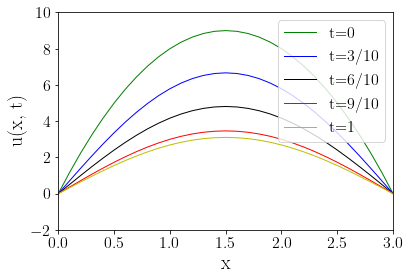

In [ ]:
# 不同时刻的温度随空间坐标的变化
import matplotlib.pyplot as plt
import numpy as np

h = 0.1
Space = np.arange(0, space_intervals_number * h + h/100, h)
plt.plot(Space, U[:, 0], 'g-', label='t=0', linewidth=1.0)
plt.plot(Space, U[:, 3000], 'b-', label='t=3/10', linewidth=1.0)
plt.plot(Space, U[:, 6000], 'k-', label='t=6/10', linewidth=1.0)
plt.plot(Space, U[:, 9000], 'r-', label='t=9/10', linewidth=1.0)
plt.plot(Space, U[:, -1], 'y-', label='t=1', linewidth=1.0)
plt.ylabel('u(x, t)', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.xlim(0, 3)
plt.ylim(-2, 10)
plt.legend(loc='upper right')
plt.show()

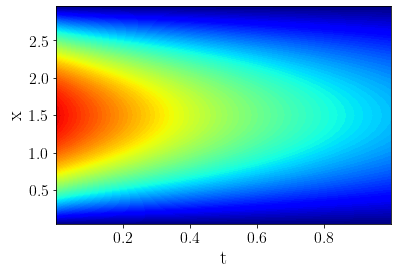

In [ ]:
#温度等高线随时空坐标的变化，温度越高，颜色越偏红
extent = [0,1,0,3]#时间和空间的取值范围
levels = np.arange(0,10,0.1)#温度等高线的变化范围0-10，变化间隔为0.1
plt.contourf(U,levels,origin='lower', extent=extent, cmap=plt.cm.jet)
plt.ylabel('x', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.show()